# HOUSING DATA OF METROPOLITIAN CITIES OF INDIA 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
from scipy.stats import shapiro
pd.options.display.max_columns= None
pd.options.display.max_rows= None

#to surpress the notation'e'
pd.options.display.float_format='{:.6f}'.format

from sklearn.model_selection import train_test_split
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.stattools import durbin_watson
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# CHENNAI

## EVALUATING RELATIONSHIP BETWEEN ALL VARIABLES

In [2]:
df_c = pd.read_csv('Chennai.csv')

In [3]:
#dropping redundant columns:

df_c = df_c.drop(['TV','DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator','WashingMachine','BED','Microwave'],axis=1)

In [4]:
df_c.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'Gasconnection', 'AC',
       'Wifi', 'Children'splayarea', 'LiftAvailable', 'VaastuCompliant',
       'GolfCourse'],
      dtype='object')

In [5]:
df_c.head()

Price  Area        Location  No. of Bedrooms  Resale  MaintenanceStaff  \
0   5500000  1310   Perungalathur                3       0                 0   
1   5350000  1126      Madhavaram                2       0                 0   
2   8205000  1307      Karapakkam                3       0                 0   
3  23400000  3600  Thiruvidandhai                3       0                 0   
4  10100000  1700  Iyappanthangal                3       0                 0   

   Gymnasium  SwimmingPool  LandscapedGardens  JoggingTrack  \
0          0             0                  0             0   
1          1             1                  1             0   
2          1             1                  1             1   
3          1             1                  0             1   
4          1             1                  1             1   

   RainWaterHarvesting  IndoorGames  ShoppingMall  Intercom  SportsFacility  \
0                    0            0             0         0               0   
1                    1            1             0         0               0   
2                    1            1             0         1               1   
3                    0            0             0         0               0   
4                    0            0             0         0               0   

   ATM  ClubHouse  School  24X7Security  PowerBackup  CarParking  \
0    0          0       0             0            0           0   
1    0          1       0             0            1           0   
2    0          1       0             1            1           1   
3    0          1       0             1            1           0   
4    0          1       0             0            1           0   

   StaffQuarter  Cafeteria  MultipurposeRoom  Hospital  Gasconnection  AC  \
0             0          0                 0         0              0   0   
1             0          0                 1         0              0   0   
2             0          1                 1         0              0   0   
3             0          1                 0         0              0   0   
4             0          0                 1         0              0   0   

   Wifi  Children'splayarea  LiftAvailable  VaastuCompliant  GolfCourse  
0     0                   0              0                0           0  
1     0                   1              1                0           0  
2     0                   1              0                0           0  
3     0                   1              0                0           0  
4     0                   1              0                1           0

In [6]:
df_c.shape

(5014, 32)

In [7]:
df_c = df_c.replace(9,np.nan)

In [9]:
df_c.isnull().sum()

Price                     0
Area                      0
Location                  0
No. of Bedrooms           0
Resale                    0
MaintenanceStaff       2781
Gymnasium              2781
SwimmingPool           2781
LandscapedGardens      2781
JoggingTrack           2781
RainWaterHarvesting    2781
IndoorGames            2781
ShoppingMall           2781
Intercom               2781
SportsFacility         2781
ATM                    2781
ClubHouse              2781
School                 2781
24X7Security           2781
PowerBackup            2781
CarParking             2781
StaffQuarter           2781
Cafeteria              2781
MultipurposeRoom       2781
Hospital               2781
Gasconnection          2781
AC                     2781
Wifi                   2781
Children'splayarea     2781
LiftAvailable          2781
VaastuCompliant        2781
GolfCourse             2781
dtype: int64

In [10]:
df_c = df_c.dropna(axis=0)

<AxesSubplot:>

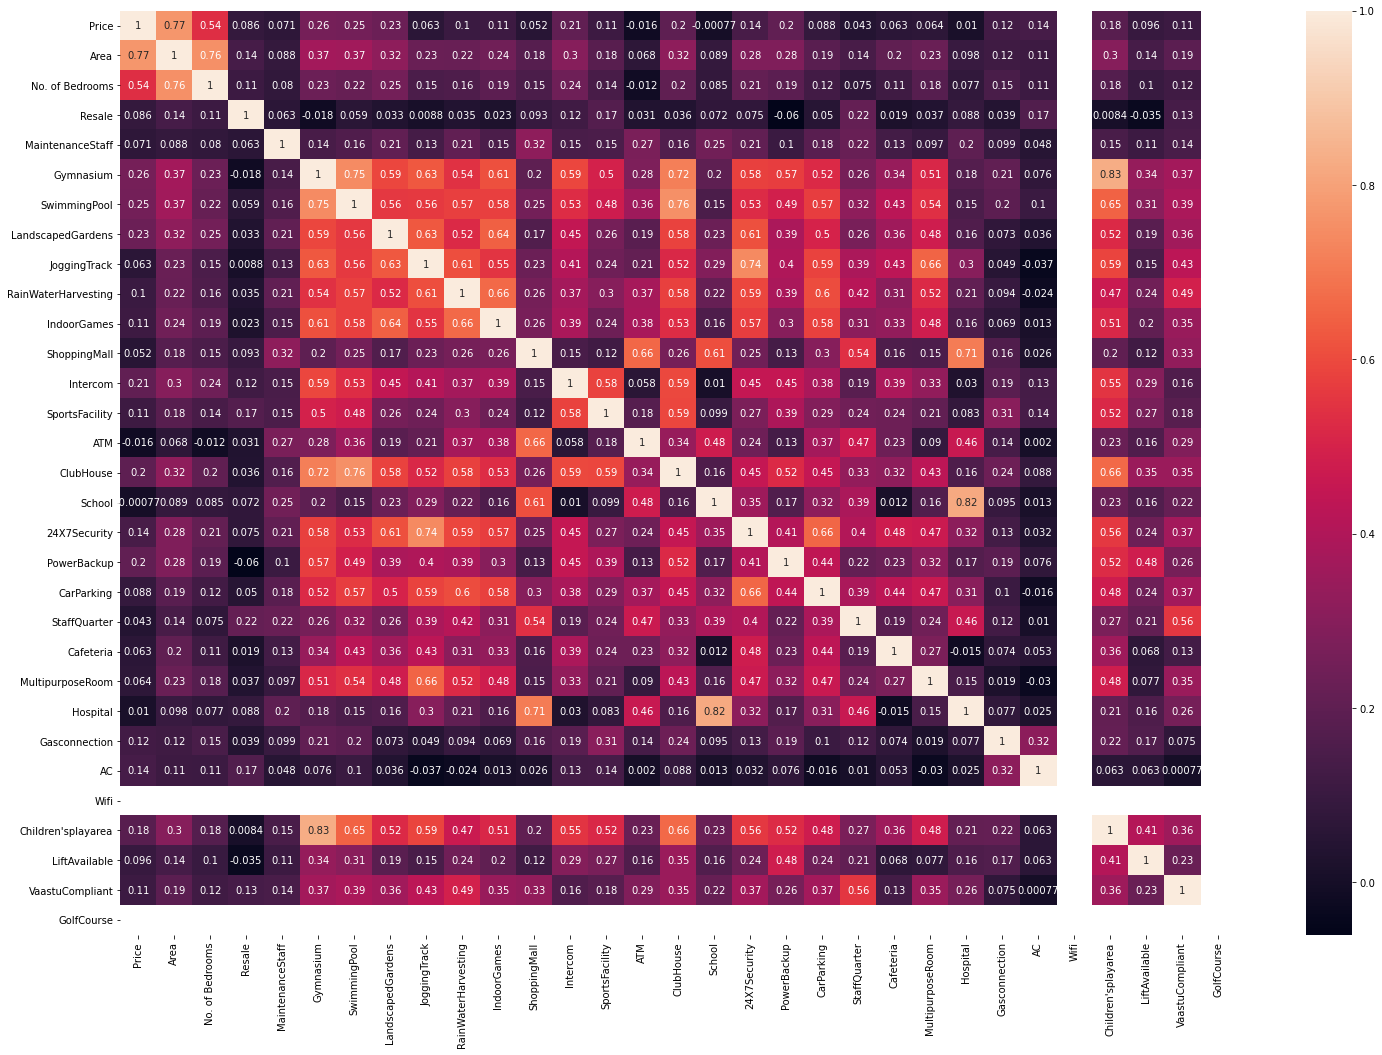

In [11]:
plt.figure(figsize=(25,17))
sns.heatmap(df_c.corr(),annot=True)

In [12]:
#Inference:
# Price columns is correlated with the Area columns.showing how pricing changes based on Squarefeet Area of the housing.
# No of bedrooms is the second highly correlated feature with the target in the chennai dataset.

### Multi-collinearity

In [13]:
df_num = df_c.select_dtypes(include=np.number)
df_num.head()

Price  Area  No. of Bedrooms  Resale  MaintenanceStaff  Gymnasium  \
0   5500000  1310                3       0          0.000000   0.000000   
1   5350000  1126                2       0          0.000000   1.000000   
2   8205000  1307                3       0          0.000000   1.000000   
3  23400000  3600                3       0          0.000000   1.000000   
4  10100000  1700                3       0          0.000000   1.000000   

   SwimmingPool  LandscapedGardens  JoggingTrack  RainWaterHarvesting  \
0      0.000000           0.000000      0.000000             0.000000   
1      1.000000           1.000000      0.000000             1.000000   
2      1.000000           1.000000      1.000000             1.000000   
3      1.000000           0.000000      1.000000             0.000000   
4      1.000000           1.000000      1.000000             0.000000   

   IndoorGames  ShoppingMall  Intercom  SportsFacility      ATM  ClubHouse  \
0     0.000000      0.000000  0.000000        0.000000 0.000000   0.000000   
1     1.000000      0.000000  0.000000        0.000000 0.000000   1.000000   
2     1.000000      0.000000  1.000000        1.000000 0.000000   1.000000   
3     0.000000      0.000000  0.000000        0.000000 0.000000   1.000000   
4     0.000000      0.000000  0.000000        0.000000 0.000000   1.000000   

    School  24X7Security  PowerBackup  CarParking  StaffQuarter  Cafeteria  \
0 0.000000      0.000000     0.000000    0.000000      0.000000   0.000000   
1 0.000000      0.000000     1.000000    0.000000      0.000000   0.000000   
2 0.000000      1.000000     1.000000    1.000000      0.000000   1.000000   
3 0.000000      1.000000     1.000000    0.000000      0.000000   1.000000   
4 0.000000      0.000000     1.000000    0.000000      0.000000   0.000000   

   MultipurposeRoom  Hospital  Gasconnection       AC     Wifi  \
0          0.000000  0.000000       0.000000 0.000000 0.000000   
1          1.000000  0.000000       0.000000 0.000000 0.000000   
2          1.000000  0.000000       0.000000 0.000000 0.000000   
3          0.000000  0.000000       0.000000 0.000000 0.000000   
4          1.000000  0.000000       0.000000 0.000000 0.000000   

   Children'splayarea  LiftAvailable  VaastuCompliant  GolfCourse  
0            0.000000       0.000000         0.000000    0.000000  
1            1.000000       1.000000         0.000000    0.000000  
2            1.000000       0.000000         0.000000    0.000000  
3            1.000000       0.000000         0.000000    0.000000  
4            1.000000       0.000000         1.000000    0.000000

In [14]:
vif = pd.DataFrame()

In [15]:
vif['VIF'] = [VIF(df_num.values,i) for i in range(df_num.shape[1])]
vif['Features'] = df_num.columns
vif.sort_values(['VIF'],ascending=False)

VIF             Features
1  24.583939                 Area
2  15.603804      No. of Bedrooms
5  10.835141            Gymnasium
27  7.403736   Children'splayarea
15  6.164160            ClubHouse
6   5.999481         SwimmingPool
8   5.599216         JoggingTrack
17  4.926871         24X7Security
18  4.767365          PowerBackup
23  4.739690             Hospital
0   4.485768                Price
10  4.276615          IndoorGames
16  3.951051               School
9   3.928326  RainWaterHarvesting
11  3.905855         ShoppingMall
28  3.890046        LiftAvailable
7   3.845980    LandscapedGardens
19  3.528564           CarParking
12  3.519987             Intercom
14  2.966451                  ATM
22  2.778551     MultipurposeRoom
13  2.749767       SportsFacility
20  2.308838         StaffQuarter
29  2.255597      VaastuCompliant
21  1.999806            Cafeteria
24  1.369836        Gasconnection
3   1.342340               Resale
4   1.234125     MaintenanceStaff
25  1.202795                   AC
26       nan                 Wifi
30       nan           GolfCourse

In [16]:
df_c['GolfCourse'].value_counts()

0.000000    2233
Name: GolfCourse, dtype: int64

In [17]:
df_c['Wifi'].value_counts()

0.000000    2233
Name: Wifi, dtype: int64

In [18]:
#Multicollinearity is null for Wifi and Golfcourse columns.

### Distribution of Variables

In [19]:
df_c.set_index('Location', inplace=True)

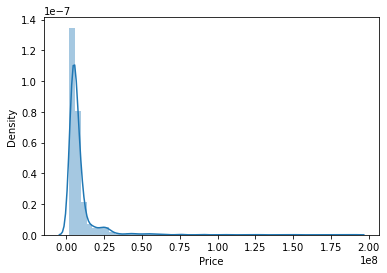

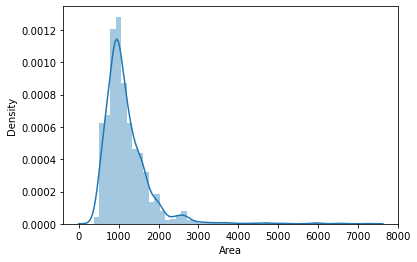

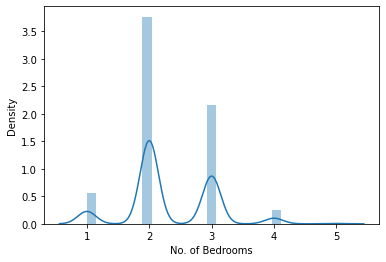

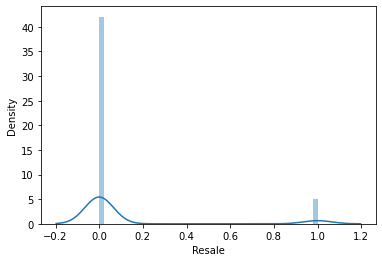

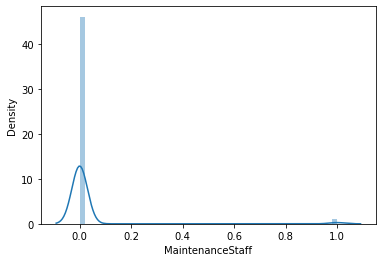

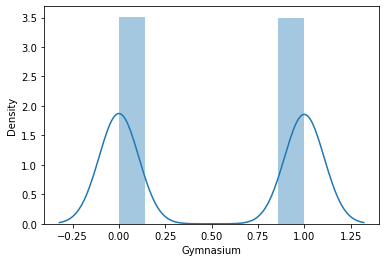

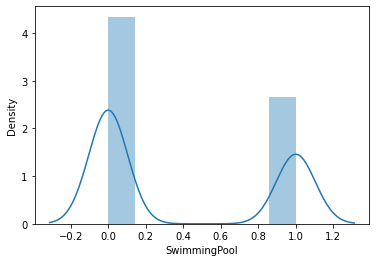

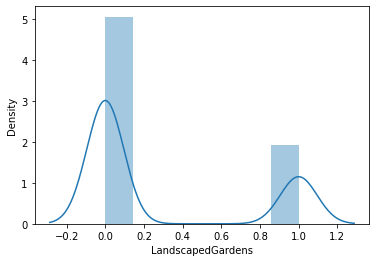

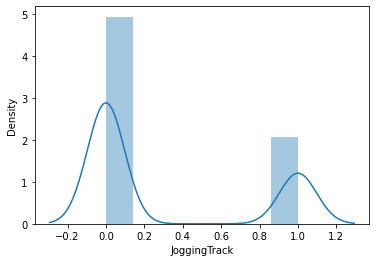

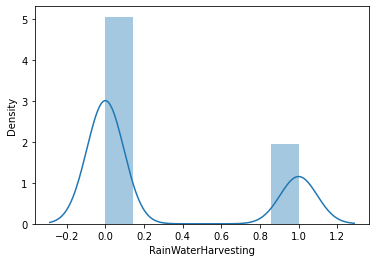

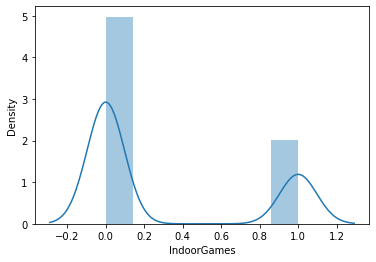

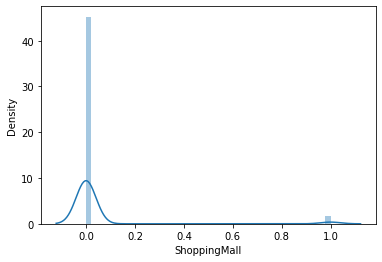

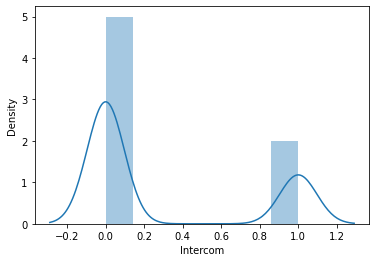

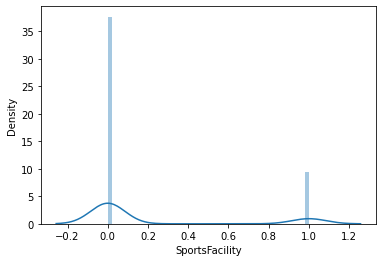

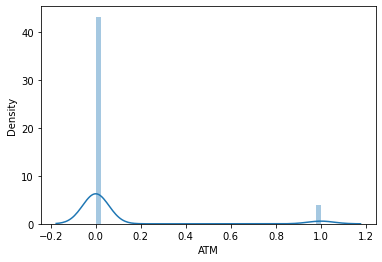

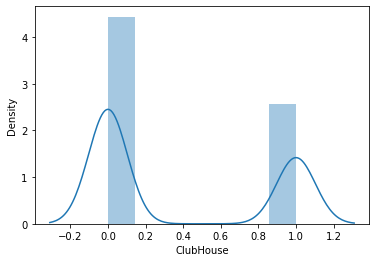

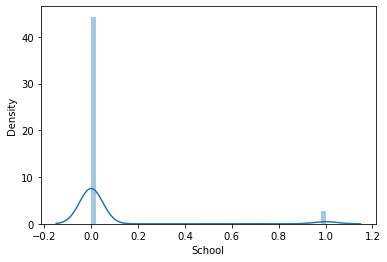

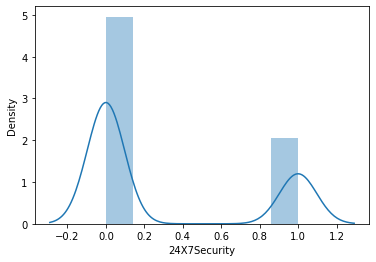

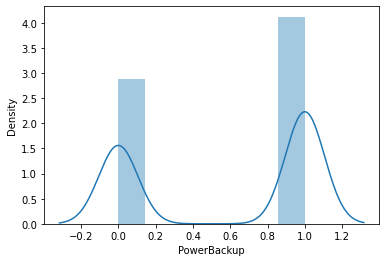

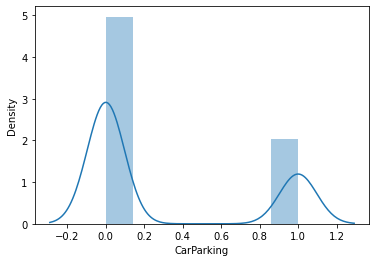

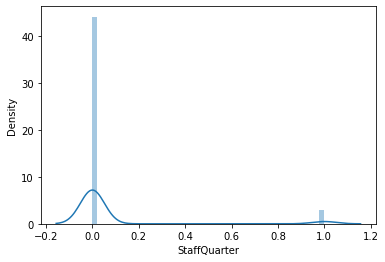

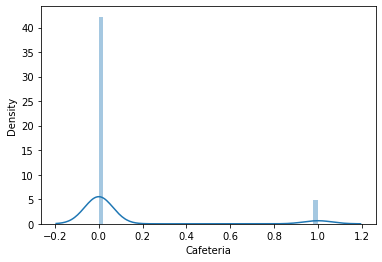

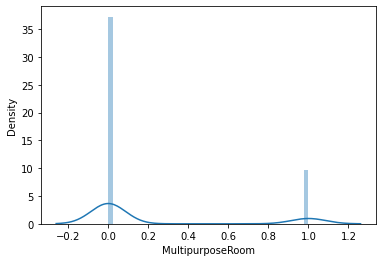

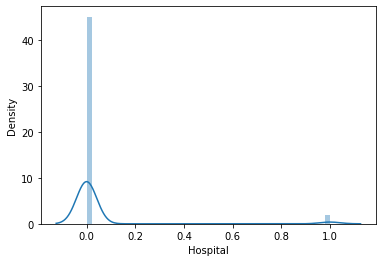

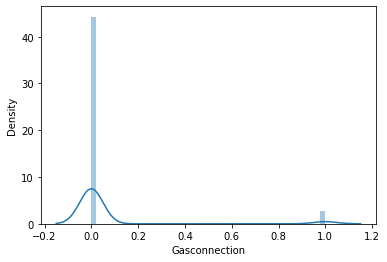

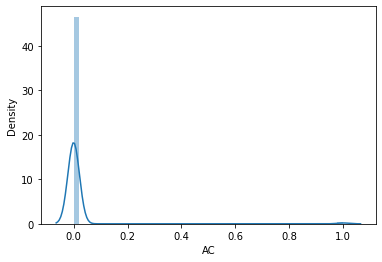

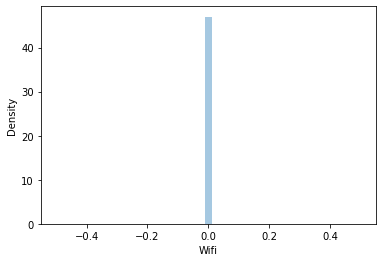

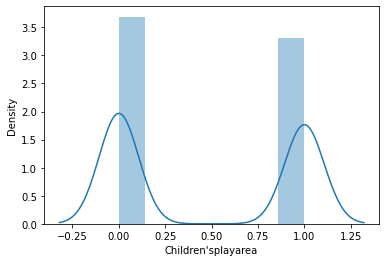

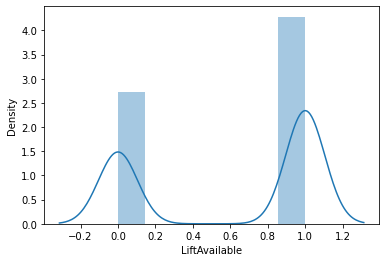

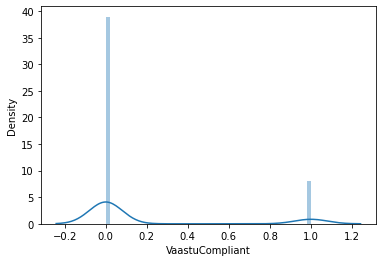

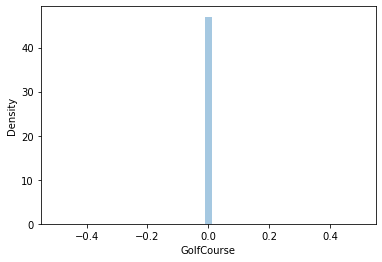

In [20]:
for i in df_c.columns:
    sns.distplot(df_c[i])
    plt.show()

In [21]:
df_c['Area'].skew() # Area column is right skewed.
# GolfCourse column has no distribution because it has only one value.

3.5583051114726563

### Presence of Outliers and Treatment

In [22]:
df_c.shape

(2233, 31)

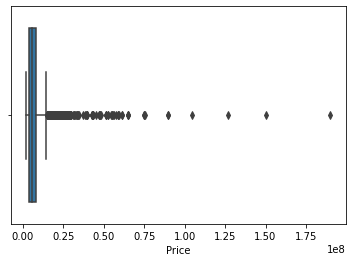

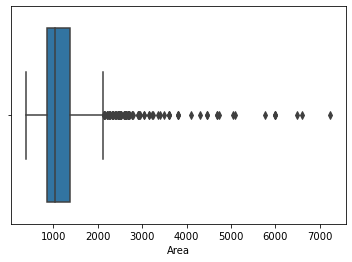

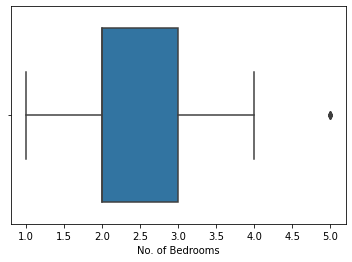

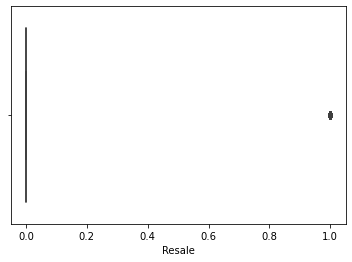

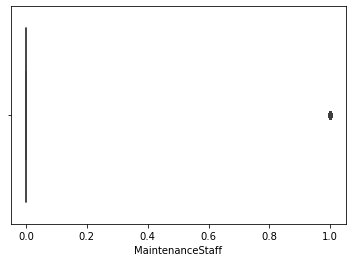

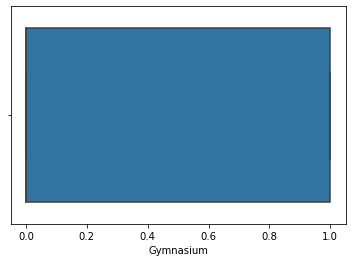

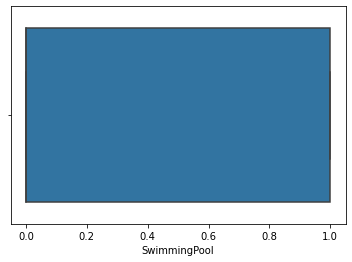

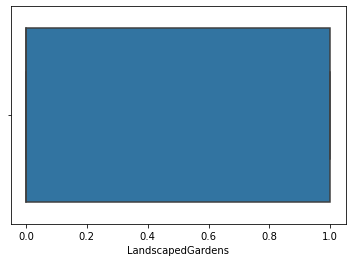

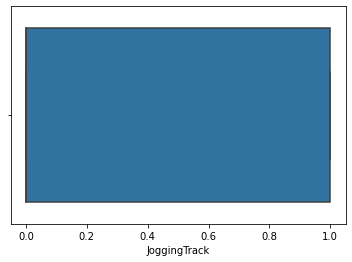

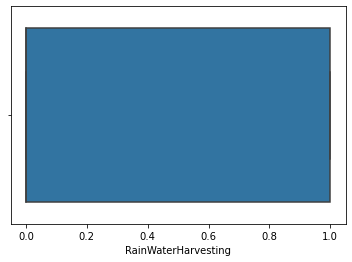

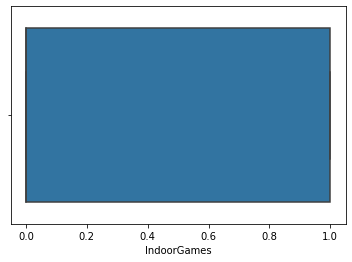

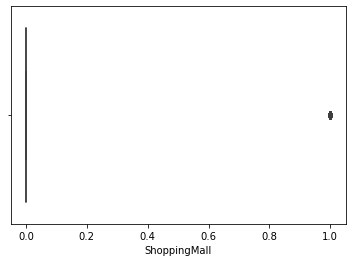

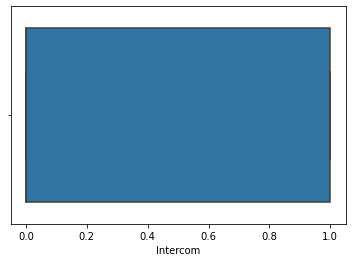

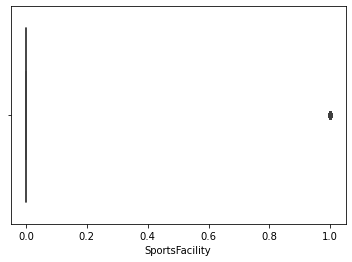

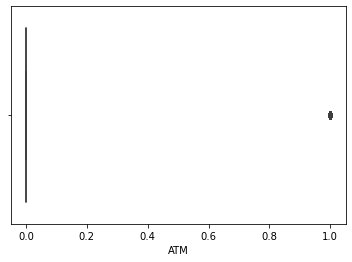

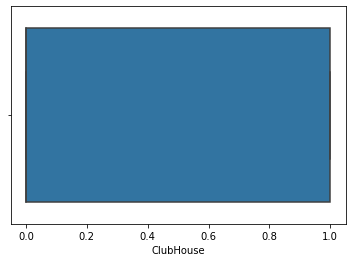

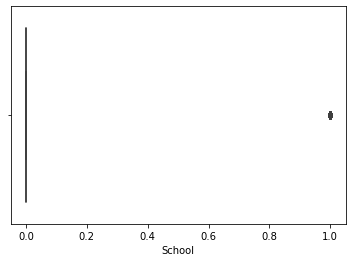

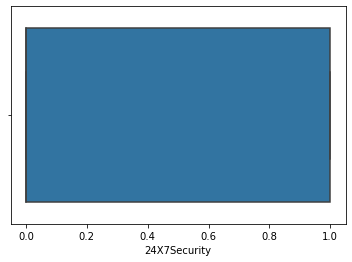

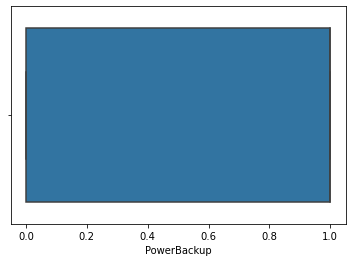

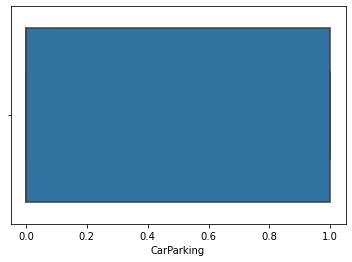

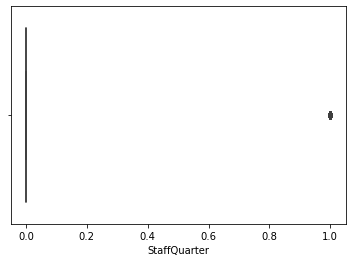

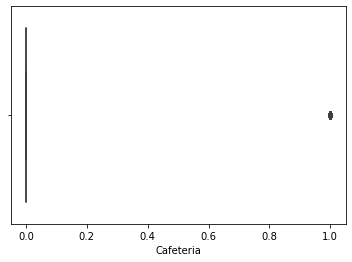

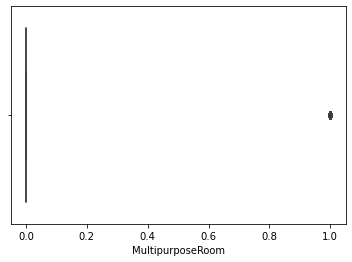

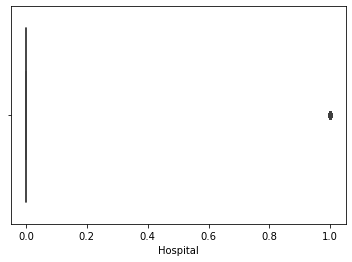

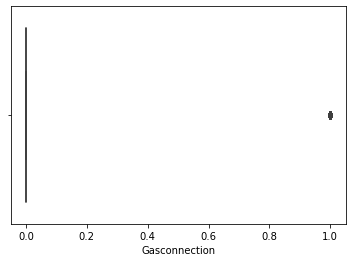

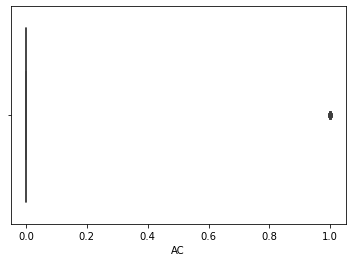

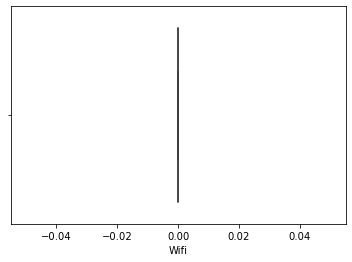

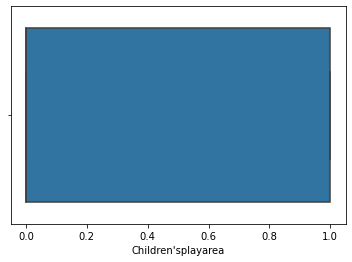

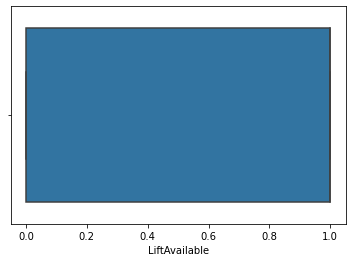

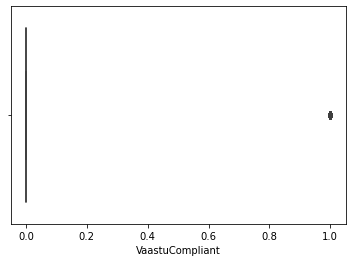

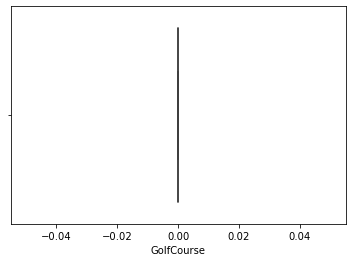

In [23]:
for i in df_c.columns:
    plt.figure()
    sns.boxplot(df_c[i])

In [24]:
# No outliers treatment necessary due to the nature of the data.

### Statistical significance of variables

In [25]:
x = df_c.drop('Price',1)
y = df_c['Price']

In [26]:
xc = sm.add_constant(x)
ols_c = sm.OLS(y,xc).fit()

In [27]:
pvalues = pd.DataFrame()

In [28]:
pvalues['Pval'] = ols_c.pvalues

In [29]:
# Significant columns
sig_col = pvalues[pvalues['Pval']<0.05] 

In [30]:
#The following are the significant columns of the chennai housing dataset.

In [31]:
sig_col

Pval
const             0.000000
Area              0.000000
No. of Bedrooms   0.000000
MaintenanceStaff  0.019730
Gymnasium         0.010072
SwimmingPool      0.002228
LandscapedGardens 0.000000
JoggingTrack      0.000001
IndoorGames       0.000011
ShoppingMall      0.031514
SportsFacility    0.037942
ClubHouse         0.004824
School            0.020377
CarParking        0.005784
Cafeteria         0.000000
MultipurposeRoom  0.000000
Gasconnection     0.003994
AC                0.008185
Wifi              0.013185

## Feature Engineering

#### Transformation

##### df_c.skew()

In [33]:
#Transformation not needed due to the nature of the data.

### Scaling the data

In [34]:
# not needed due to the nature of the data.

### Feature Selection

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)

In [37]:
lr = LinearRegression()

In [38]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [39]:
bwd = sfs(estimator = lr,k_features='best',forward=False,cv=5,scoring='r2')

In [40]:
bwd_mod = bwd.fit(x_train,y_train)

In [41]:
bwd_names = bwd_mod.k_feature_names_
bwd_feat = list(bwd_names)
bwd_feat

['Area',
 'No. of Bedrooms',
 'SwimmingPool',
 'LandscapedGardens',
 'JoggingTrack',
 'IndoorGames',
 'ClubHouse',
 'School',
 'CarParking',
 'Cafeteria',
 'MultipurposeRoom',
 'Gasconnection']

# Assumptions

### Regression

In [42]:
x = df_c[['Area',
 'No. of Bedrooms',
 'SwimmingPool',
 'LandscapedGardens',
 'JoggingTrack',
 'IndoorGames',
 'ClubHouse',
 'School',
 'CarParking',
 'Cafeteria',
 'MultipurposeRoom',
 'Gasconnection']]
y = df_c['Price']

In [43]:
xc = sm.add_constant(x)
ols_c = sm.OLS(y,xc).fit()
ols_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     329.6
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        20:42:02   Log-Likelihood:                -38092.
No. Observations:                2233   AIC:                         7.621e+04
Df Residuals:                    2220   BIC:                         7.628e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -4.845e+06   4.87e+05     -9.939      0.000    -5.8e+06   -3.89e+06
Area                1.53e+04    358.809     42.647      0.000    1.46e+04     1.6e+04
No. of Bedrooms   -1.925e+06   2.99e+05     -6.433      0.000   -2.51e+06   -1.34e+06
SwimmingPool       1.922e+06   4.89e+05      3.929      0.000    9.63e+05    2.88e+06
LandscapedGardens  3.752e+06   4.51e+05      8.313      0.000    2.87e+06    4.64e+06
JoggingTrack      -2.112e+06   4.74e+05     -4.456      0.000   -3.04e+06   -1.18e+06
IndoorGames       -2.088e+06   4.27e+05     -4.889      0.000   -2.93e+06   -1.25e+06
ClubHouse          -1.55e+06   4.46e+05     -3.473      0.001   -2.43e+06   -6.75e+05
School            -3.211e+06   6.22e+05     -5.166      0.000   -4.43e+06   -1.99e+06
CarParking         1.241e+06   4.21e+05      2.952      0.003    4.17e+05    2.07e+06
Cafeteria         -3.678e+06   5.19e+05     -7.082      0.000    -4.7e+06   -2.66e+06
MultipurposeRoom  -2.319e+06   4.54e+05     -5.104      0.000   -3.21e+06   -1.43e+06
Gasconnection      2.135e+06   5.91e+05      3.613      0.000    9.76e+05    3.29e+06
==============================================================================
Omnibus:                     1720.895   Durbin-Watson:                   1.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           155273.632
Skew:                           2.958   Prob(JB):                         0.00
Kurtosis:                      43.421   Cond. No.                     6.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
print('The Accuracy of the above CHENNAI DATASET using OLS method is:',ols_c.rsquared)

The Accuracy of the above CHENNAI DATASET using OLS method iS: 0.6404847202008017


# BANGALORE

### EVALUATING RELATIONSHIP BETWEEN ALL VARIABLES

In [45]:
df_b = pd.read_csv('Bangalore.csv')

In [46]:
df_b.shape

(6207, 40)

In [47]:
#dropping redundant columns

In [48]:
df_b = df_b.drop(['TV','DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator','WashingMachine','BED','Microwave'],axis=1)

In [49]:
df_b = df_b.replace(9,np.nan)

In [50]:
df_b.isnull().sum()

Price                     0
Area                      0
Location                  0
No. of Bedrooms           0
Resale                    0
MaintenanceStaff       4256
Gymnasium              4256
SwimmingPool           4256
LandscapedGardens      4256
JoggingTrack           4256
RainWaterHarvesting    4256
IndoorGames            4256
ShoppingMall           4256
Intercom               4256
SportsFacility         4256
ATM                    4256
ClubHouse              4256
School                 4256
24X7Security           4256
PowerBackup            4256
CarParking             4256
StaffQuarter           4256
Cafeteria              4256
MultipurposeRoom       4256
Hospital               4256
Gasconnection          4256
AC                     4256
Wifi                   4256
Children'splayarea     4256
LiftAvailable          4256
VaastuCompliant        4256
GolfCourse             4256
dtype: int64

In [51]:
#dropping null values.

In [52]:
df_b = df_b.dropna(axis=0)

In [53]:
df_b.set_index('Location', inplace=True)

<AxesSubplot:>

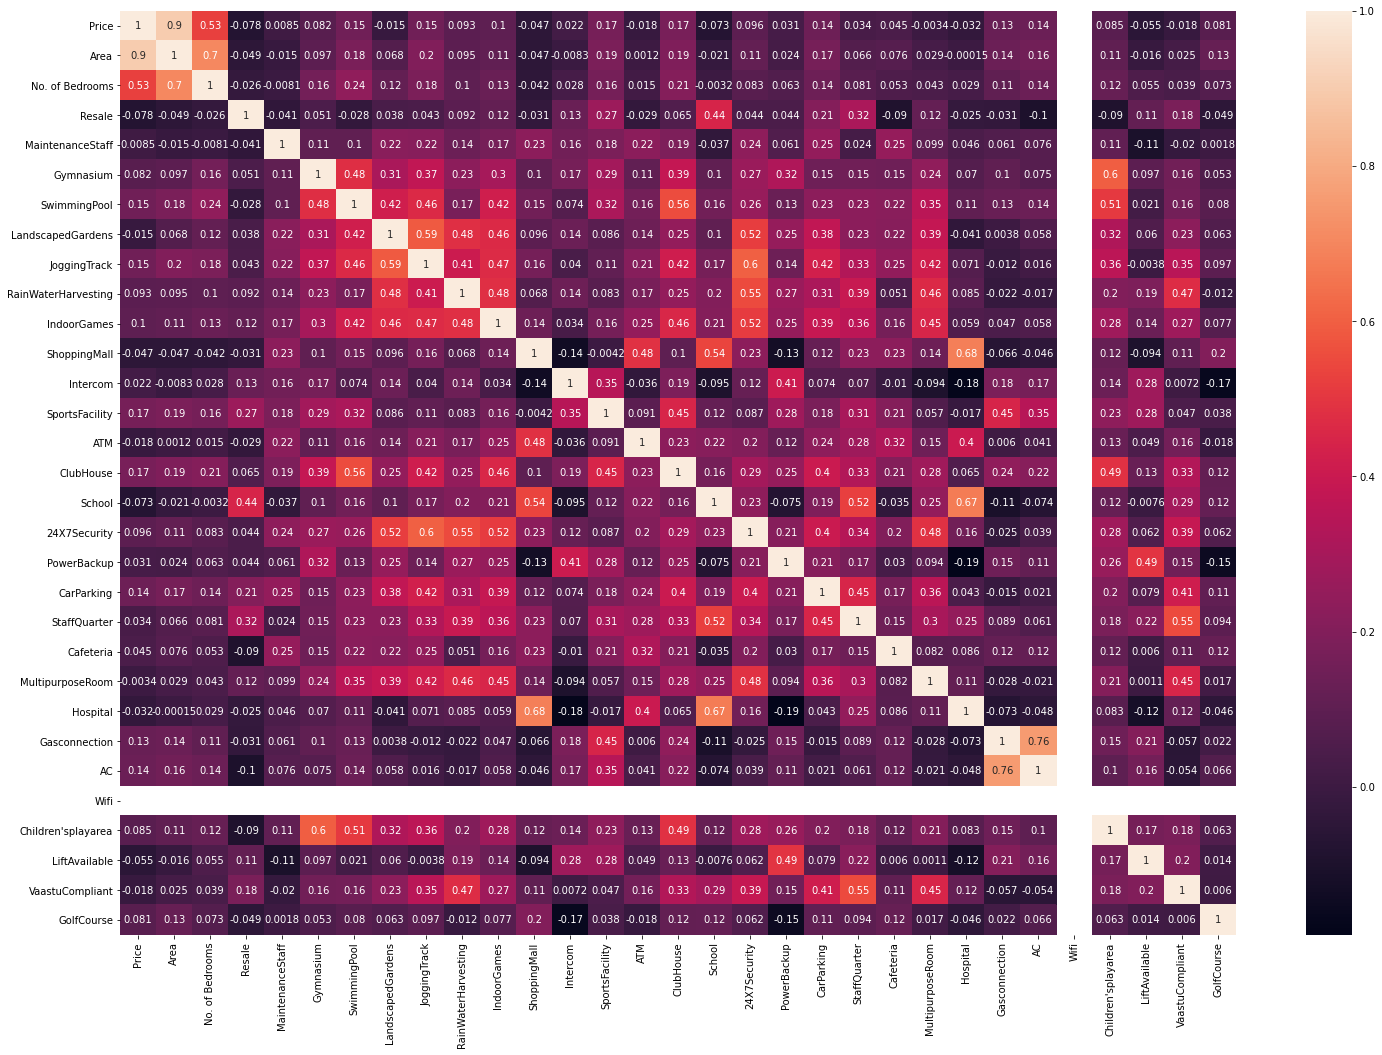

In [54]:
plt.figure(figsize=(25,17))
sns.heatmap(df_b.corr(),annot=True)

In [55]:
#Area and No of Bedrooms are correlated with the target variable 'Price'.

### Multi-collinearity

In [56]:
df_num = df_b.select_dtypes(include=np.number)
df_num.head()

Price  Area  No. of Bedrooms  Resale  \
Location                                                                   
JP Nagar Phase 1                 30000000  3340                4       0   
Dasarahalli on Tumkur Road        7888000  1045                2       0   
Kannur on Thanisandra Main Road   4866000  1179                2       0   
Doddanekundi                      8358000  1675                3       0   
Kengeri                           6845000  1670                3       0   

                                 MaintenanceStaff  Gymnasium  SwimmingPool  \
Location                                                                     
JP Nagar Phase 1                         1.000000   1.000000      1.000000   
Dasarahalli on Tumkur Road               0.000000   1.000000      1.000000   
Kannur on Thanisandra Main Road          0.000000   1.000000      1.000000   
Doddanekundi                             0.000000   0.000000      0.000000   
Kengeri                                  1.000000   1.000000      1.000000   

                                 LandscapedGardens  JoggingTrack  \
Location                                                           
JP Nagar Phase 1                          1.000000      1.000000   
Dasarahalli on Tumkur Road                1.000000      1.000000   
Kannur on Thanisandra Main Road           1.000000      1.000000   
Doddanekundi                              0.000000      0.000000   
Kengeri                                   1.000000      1.000000   

                                 RainWaterHarvesting  IndoorGames  \
Location                                                            
JP Nagar Phase 1                            1.000000     1.000000   
Dasarahalli on Tumkur Road                  1.000000     1.000000   
Kannur on Thanisandra Main Road             1.000000     0.000000   
Doddanekundi                                0.000000     0.000000   
Kengeri                                     1.000000     1.000000   

                                 ShoppingMall  Intercom  SportsFacility  \
Location                                                                  
JP Nagar Phase 1                     0.000000  1.000000        1.000000   
Dasarahalli on Tumkur Road           0.000000  0.000000        1.000000   
Kannur on Thanisandra Main Road      0.000000  1.000000        0.000000   
Doddanekundi                         0.000000  1.000000        0.000000   
Kengeri                              0.000000  1.000000        1.000000   

                                     ATM  ClubHouse   School  24X7Security  \
Location                                                                     
JP Nagar Phase 1                0.000000   1.000000 0.000000      1.000000   
Dasarahalli on Tumkur Road      0.000000   1.000000 0.000000      1.000000   
Kannur on Thanisandra Main Road 0.000000   0.000000 0.000000      1.000000   
Doddanekundi                    0.000000   0.000000 0.000000      0.000000   
Kengeri                         0.000000   1.000000 0.000000      1.000000   

                                 PowerBackup  CarParking  StaffQuarter  \
Location                                                                 
JP Nagar Phase 1                    1.000000    0.000000      0.000000   
Dasarahalli on Tumkur Road          1.000000    1.000000      0.000000   
Kannur on Thanisandra Main Road     0.000000    0.000000      0.000000   
Doddanekundi                        1.000000    0.000000      0.000000   
Kengeri                             1.000000    1.000000      0.000000   

                                 Cafeteria  MultipurposeRoom  Hospital  \
Location                                                                 
JP Nagar Phase 1                  0.000000          0.000000  0.000000   
Dasarahalli on Tumkur Road        0.000000          1.000000  0.000000   
Kannur on Thanisandra Main Road   0.000000          0.000000  0.000000   
Doddanekundi                     

In [57]:
vif = pd.DataFrame()

In [58]:
vif['VIF'] = [VIF(df_num.values,i) for i in range(df_num.shape[1])]
vif['Features'] = df_num.columns
vif.sort_values(['VIF'],ascending=True)

VIF             Features
30  1.458456           GolfCourse
4   1.602627     MaintenanceStaff
21  1.742940            Cafeteria
14  1.954918                  ATM
3   2.404751               Resale
25  2.918248                   AC
20  3.114113         StaffQuarter
11  3.138984         ShoppingMall
24  3.502483        Gasconnection
29  3.811664      VaastuCompliant
22  4.114657     MultipurposeRoom
23  4.281555             Hospital
13  4.297181       SportsFacility
19  4.358973           CarParking
10  4.631546          IndoorGames
16  5.492212               School
9   6.060973  RainWaterHarvesting
7   7.004015    LandscapedGardens
12  7.197290             Intercom
17  8.121551         24X7Security
8   8.376309         JoggingTrack
15  8.563290            ClubHouse
0  10.633218                Price
28 10.865458        LiftAvailable
6  14.381470         SwimmingPool
18 19.248482          PowerBackup
27 19.677926   Children'splayarea
5  24.862504            Gymnasium
2  32.317233      No. of Bedrooms
1  47.126062                 Area
26       nan                 Wifi

In [59]:
# Multicollinearity if null for Wifi.

### Distribution of Variables

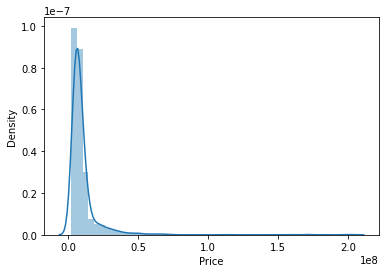

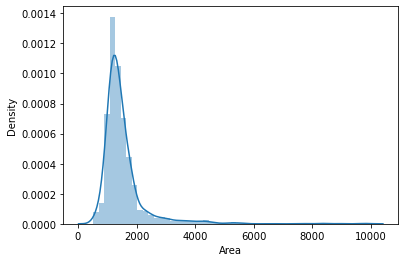

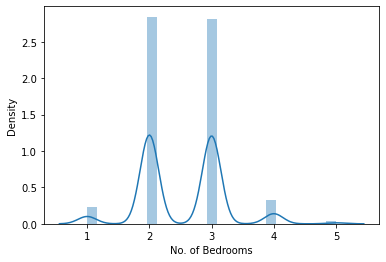

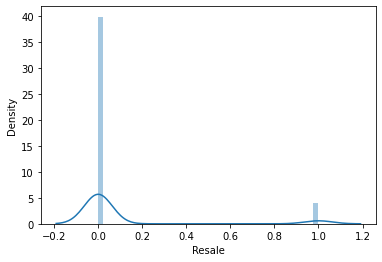

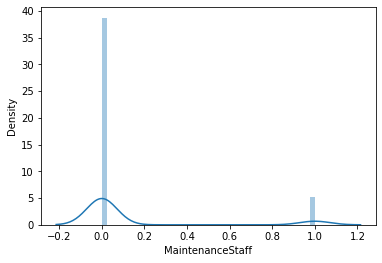

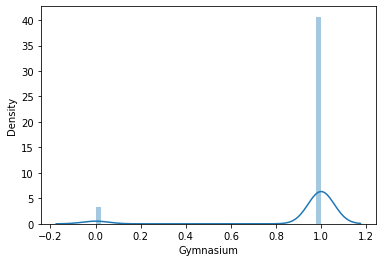

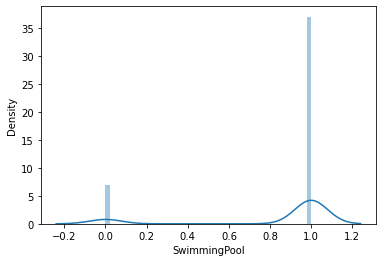

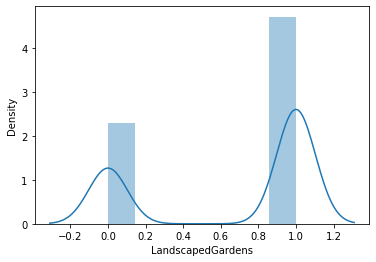

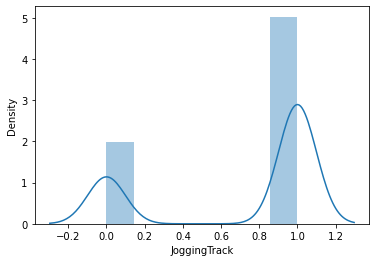

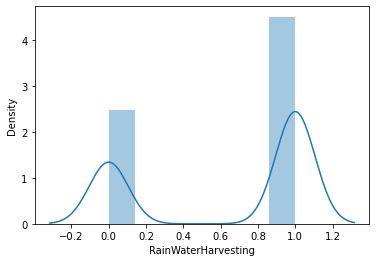

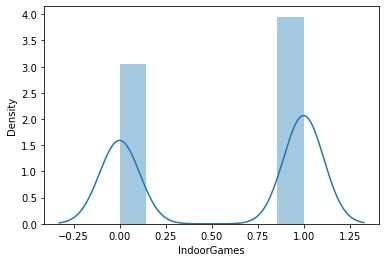

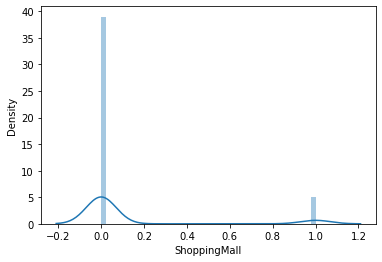

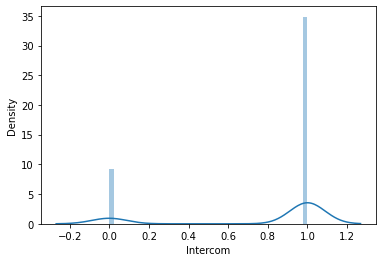

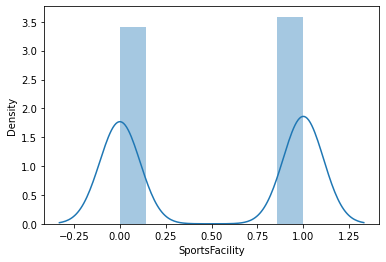

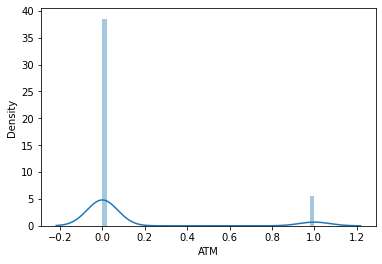

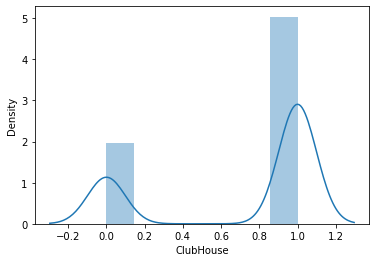

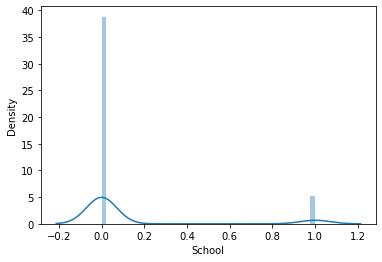

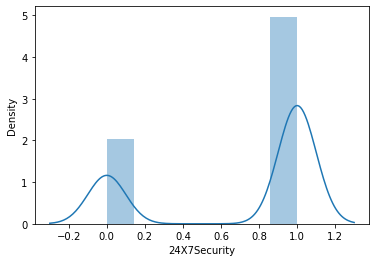

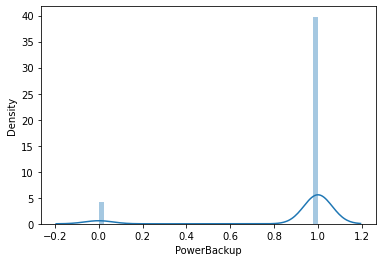

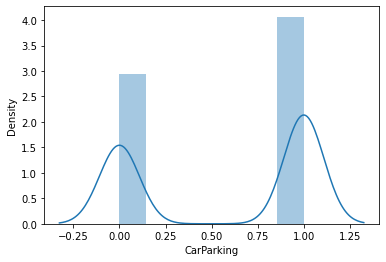

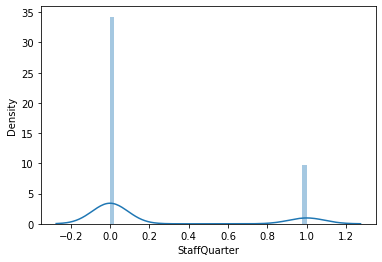

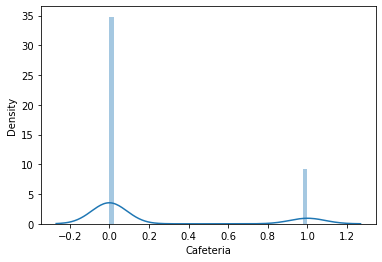

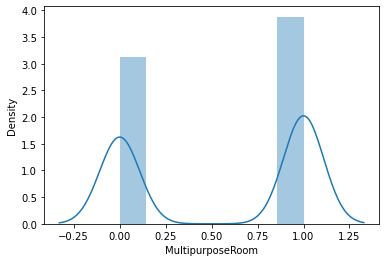

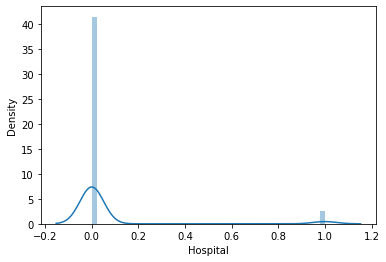

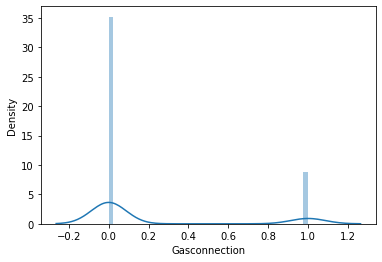

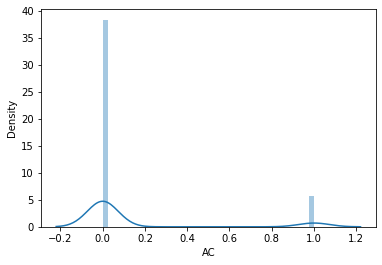

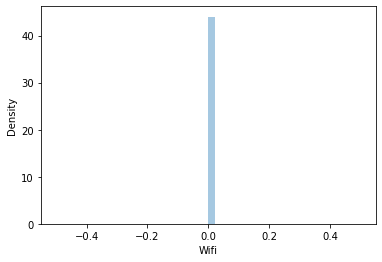

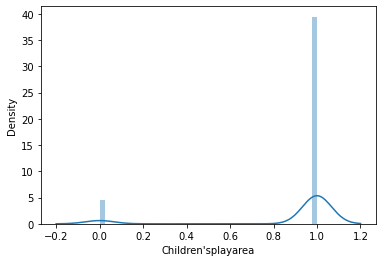

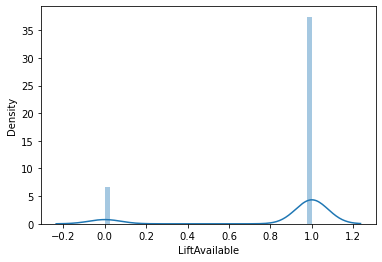

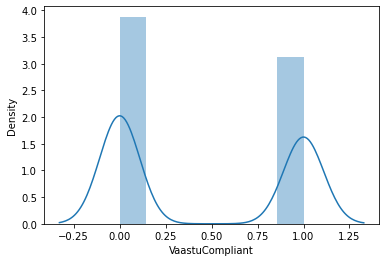

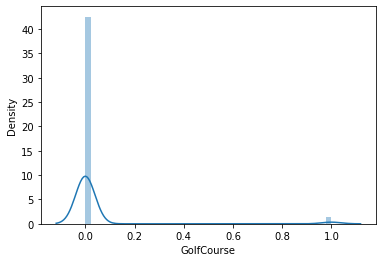

In [60]:
for i in df_b.columns:
    sns.distplot(df_b[i])
    plt.show()

In [61]:
#Area is right skewed.

### Presence of Outliers and Treatment

In [62]:
df_b.shape

(1951, 31)

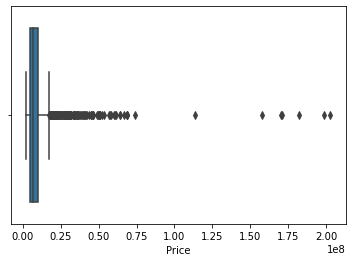

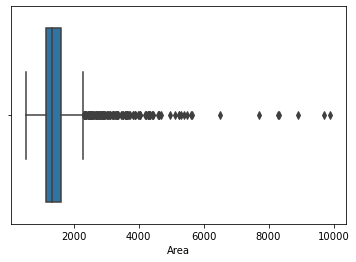

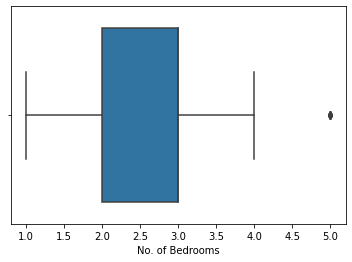

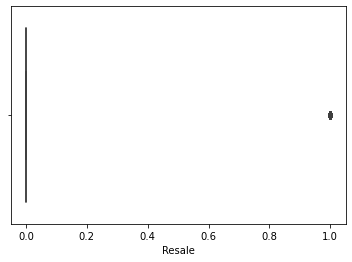

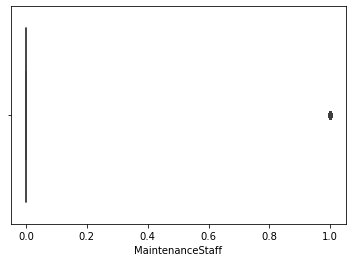

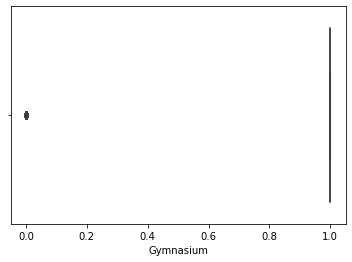

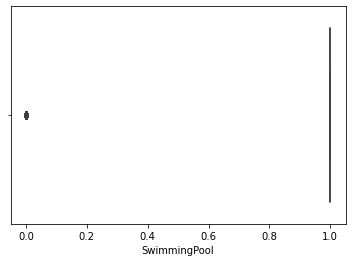

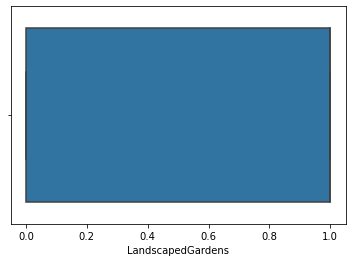

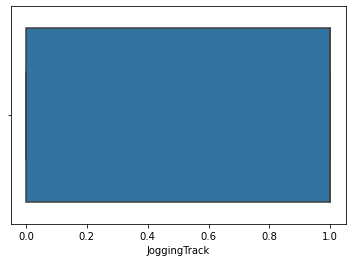

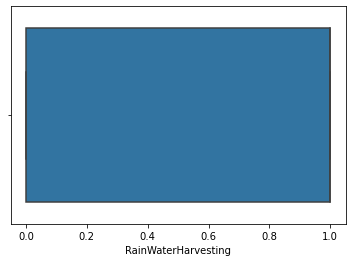

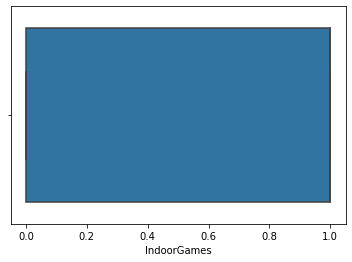

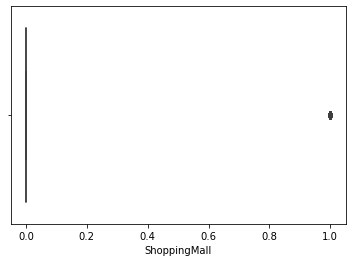

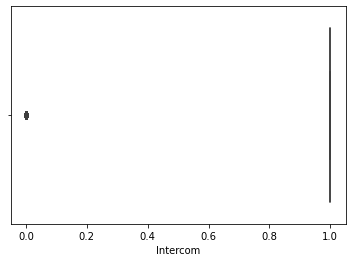

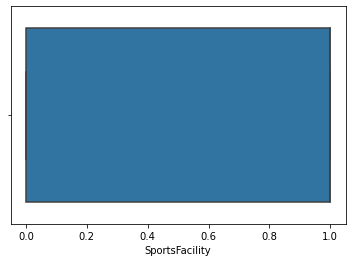

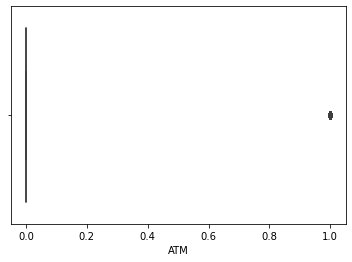

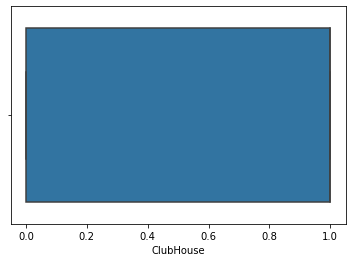

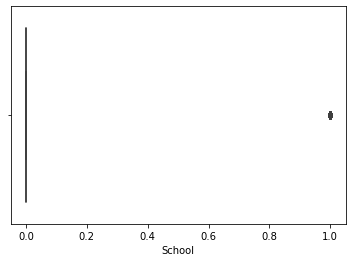

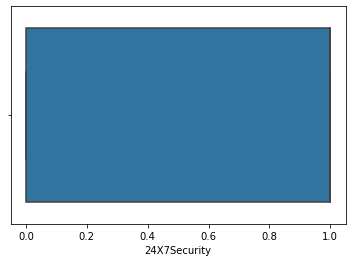

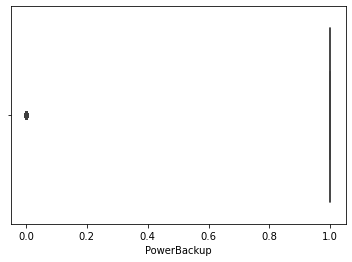

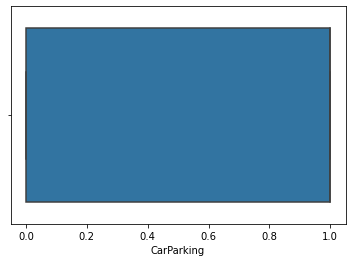

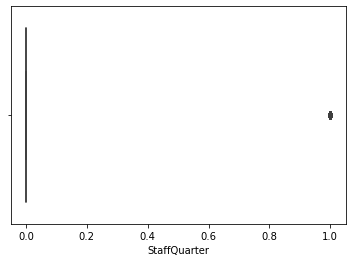

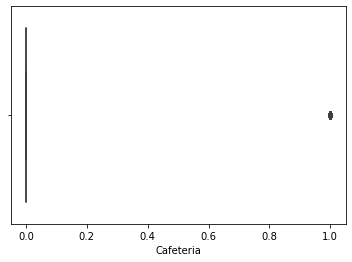

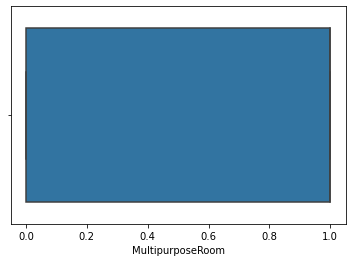

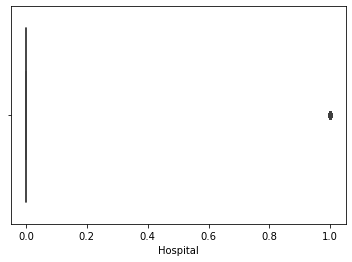

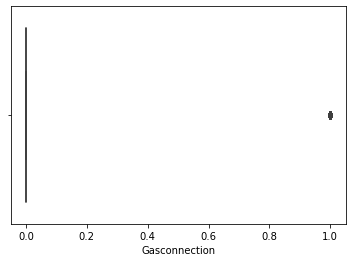

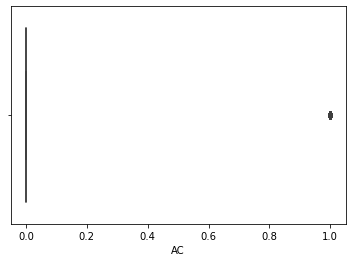

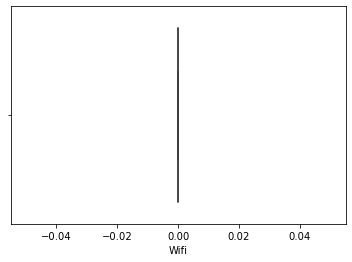

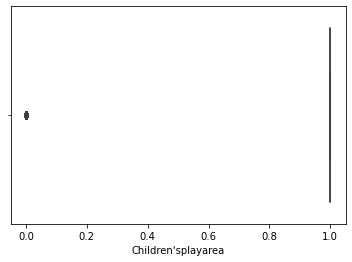

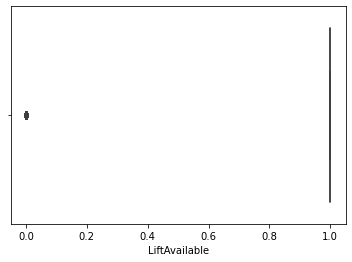

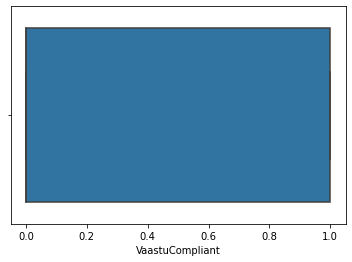

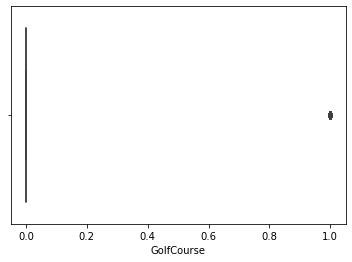

In [63]:
for i in df_b.columns:
    plt.figure()
    sns.boxplot(df_b[i])

In [64]:
# No outliers treatment necessary  due to the nature of the data.

### Statistical significance of variables

In [65]:
x = df_b.drop('Price',1)
y = df_b['Price']

In [66]:
xc = sm.add_constant(x)
ols_b = sm.OLS(y,xc).fit()

In [67]:
pvalues = pd.DataFrame()

In [68]:
pvalues['Pval'] = ols_b.pvalues

In [69]:
# Significant columns
pvalues[pvalues['Pval']<0.05] 

Pval
const               0.000000
Area                0.000000
No. of Bedrooms     0.000000
SwimmingPool        0.000024
LandscapedGardens   0.000000
RainWaterHarvesting 0.000000
IndoorGames         0.000927
ShoppingMall        0.000000
Intercom            0.014727
ATM                 0.001825
School              0.000230
CarParking          0.026413
StaffQuarter        0.036590
Cafeteria           0.024473
MultipurposeRoom    0.010368
Hospital            0.029081
Wifi                0.013455
LiftAvailable       0.000003
VaastuCompliant     0.000189
GolfCourse          0.000290

## Feature Engineering

#### Transformation

In [70]:
df_b.skew()

Price                  8.424911
Area                   4.499048
No. of Bedrooms        0.270772
Resale                 2.820063
MaintenanceStaff       2.341435
Gymnasium             -3.206294
SwimmingPool          -1.888735
LandscapedGardens     -0.735583
JoggingTrack          -0.967391
RainWaterHarvesting   -0.607927
IndoorGames           -0.261764
ShoppingMall           2.426310
Intercom              -1.439231
SportsFacility        -0.050285
ATM                    2.275751
ClubHouse             -0.978673
School                 2.371687
24X7Security          -0.922989
PowerBackup           -2.747867
CarParking            -0.327456
StaffQuarter           1.342898
Cafeteria              1.435403
MultipurposeRoom      -0.219832
Hospital               3.828765
Gasconnection          1.505972
AC                     2.226790
Wifi                   0.000000
Children'splayarea    -2.613777
LiftAvailable         -1.971229
VaastuCompliant        0.219832
GolfCourse             5.204950
dtype: f

In [71]:
#Transformation not needed due to the nature of the data.

### Feature Selection

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)

In [74]:
lr = LinearRegression()

In [75]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [76]:
bwd = sfs(estimator = lr,k_features='best',forward=False,cv=5,scoring='r2')

In [77]:
bwd_mod = bwd.fit(x_train,y_train)

In [78]:
bwd_names = bwd_mod.k_feature_names_
bwd_feat = list(bwd_names)
bwd_feat

['Area',
 'No. of Bedrooms',
 'MaintenanceStaff',
 'SwimmingPool',
 'LandscapedGardens',
 'JoggingTrack',
 'RainWaterHarvesting',
 'ShoppingMall',
 'Intercom',
 'ATM',
 'ClubHouse',
 'School',
 'StaffQuarter',
 'Cafeteria',
 'Hospital',
 'Wifi',
 "Children'splayarea",
 'VaastuCompliant',
 'GolfCourse']

## Assumptions

### Regression

In [79]:
x = df_b[['Area',
 'No. of Bedrooms',
 'MaintenanceStaff',
 'SwimmingPool',
 'LandscapedGardens',
 'JoggingTrack',
 'RainWaterHarvesting',
 'ShoppingMall',
 'Intercom',
 'ATM',
 'ClubHouse',
 'School',
 'StaffQuarter',
 'Cafeteria',
 'Hospital',
 'Wifi',
 "Children'splayarea",
 'VaastuCompliant',
 'GolfCourse']]
y = df_b['Price']

In [80]:
xc = sm.add_constant(x)
ols_b = sm.OLS(y,xc).fit()
ols_b.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     635.9
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        20:42:16   Log-Likelihood:                -32828.
No. Observations:                1951   AIC:                         6.569e+04
Df Residuals:                    1932   BIC:                         6.580e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -7.543e+06   5.71e+05    -13.213      0.000   -8.66e+06   -6.42e+06
Area                 1.769e+04    210.662     83.986      0.000    1.73e+04    1.81e+04
No. of Bedrooms     -4.052e+06   2.38e+05    -17.055      0.000   -4.52e+06   -3.59e+06
MaintenanceStaff     6.482e+05    3.9e+05      1.664      0.096   -1.16e+05    1.41e+06
SwimmingPool         1.984e+06    4.3e+05      4.619      0.000    1.14e+06    2.83e+06
LandscapedGardens   -3.462e+06   3.39e+05    -10.202      0.000   -4.13e+06    -2.8e+06
JoggingTrack         4.054e+05   3.49e+05      1.160      0.246    -2.8e+05    1.09e+06
RainWaterHarvesting  2.307e+06   3.07e+05      7.518      0.000    1.71e+06    2.91e+06
ShoppingMall         3.141e+06   5.75e+05      5.465      0.000    2.01e+06    4.27e+06
Intercom             6.576e+05   3.02e+05      2.176      0.030    6.49e+04    1.25e+06
ATM                 -1.192e+06   4.29e+05     -2.780      0.005   -2.03e+06   -3.51e+05
ClubHouse            4.045e+05   3.51e+05      1.153      0.249   -2.84e+05    1.09e+06
School               -2.99e+06   5.91e+05     -5.061      0.000   -4.15e+06   -1.83e+06
StaffQuarter         9.363e+05   3.89e+05      2.404      0.016    1.73e+05     1.7e+06
Cafeteria             -7.6e+05   3.17e+05     -2.401      0.016   -1.38e+06   -1.39e+05
Hospital            -1.867e+06   8.58e+05     -2.176      0.030   -3.55e+06   -1.85e+05
Wifi                -6.206e-10    7.7e-11     -8.064      0.000   -7.72e-10    -4.7e-10
Children'splayarea  -1.433e+05   4.54e+05     -0.316      0.752   -1.03e+06    7.46e+05
VaastuCompliant     -1.469e+06   2.99e+05     -4.911      0.000   -2.06e+06   -8.82e+05
GolfCourse          -2.744e+06   7.03e+05     -3.904      0.000   -4.12e+06   -1.37e+06
==============================================================================
Omnibus:                     1741.228   Durbin-Watson:                   1.329
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           155993.289
Skew:                           3.774   Prob(JB):                         0.00
Kurtosis:                      46.150   Cond. No.                     5.77e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.69e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [81]:
print('The Accuracy of the BANGALORE DATASET using OLS method is:' ,(ols_b.rsquared*100).round(2),'%')

The Accuracy of the BANGALORE DATASET using OLS method is: 85.56 %


# DELHI

In [82]:
df_d = pd.read_csv('Delhi.csv')

In [83]:
#dropping redundant columns

In [84]:
df_d = df_d.drop(['TV','DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator','WashingMachine','BED','Microwave'],axis=1)

## EVALUATING RELATIONSHIP BETWEEN ALL VARIABLES

In [85]:
df_d = df_d.replace(9,np.nan)

In [86]:
df_d.shape

(4998, 32)

In [87]:
df_d.isnull().sum()

Price                     0
Area                      0
Location                  0
No. of Bedrooms           0
Resale                    0
MaintenanceStaff       2996
Gymnasium              2996
SwimmingPool           2996
LandscapedGardens      2996
JoggingTrack           2996
RainWaterHarvesting    2996
IndoorGames            2996
ShoppingMall           2996
Intercom               2996
SportsFacility         2996
ATM                    2996
ClubHouse              2996
School                 2996
24X7Security           2996
PowerBackup            2996
CarParking             2996
StaffQuarter           2996
Cafeteria              2996
MultipurposeRoom       2996
Hospital               2996
Gasconnection          2996
AC                     2996
Wifi                   2996
Children'splayarea     2996
LiftAvailable          2996
VaastuCompliant        2996
GolfCourse             2996
dtype: int64

In [88]:
#null value treatment.

In [89]:
df_d = df_d.dropna(axis=0)

In [90]:
df_d.set_index('Location', inplace=True)

In [91]:
#correlation plot

<AxesSubplot:>

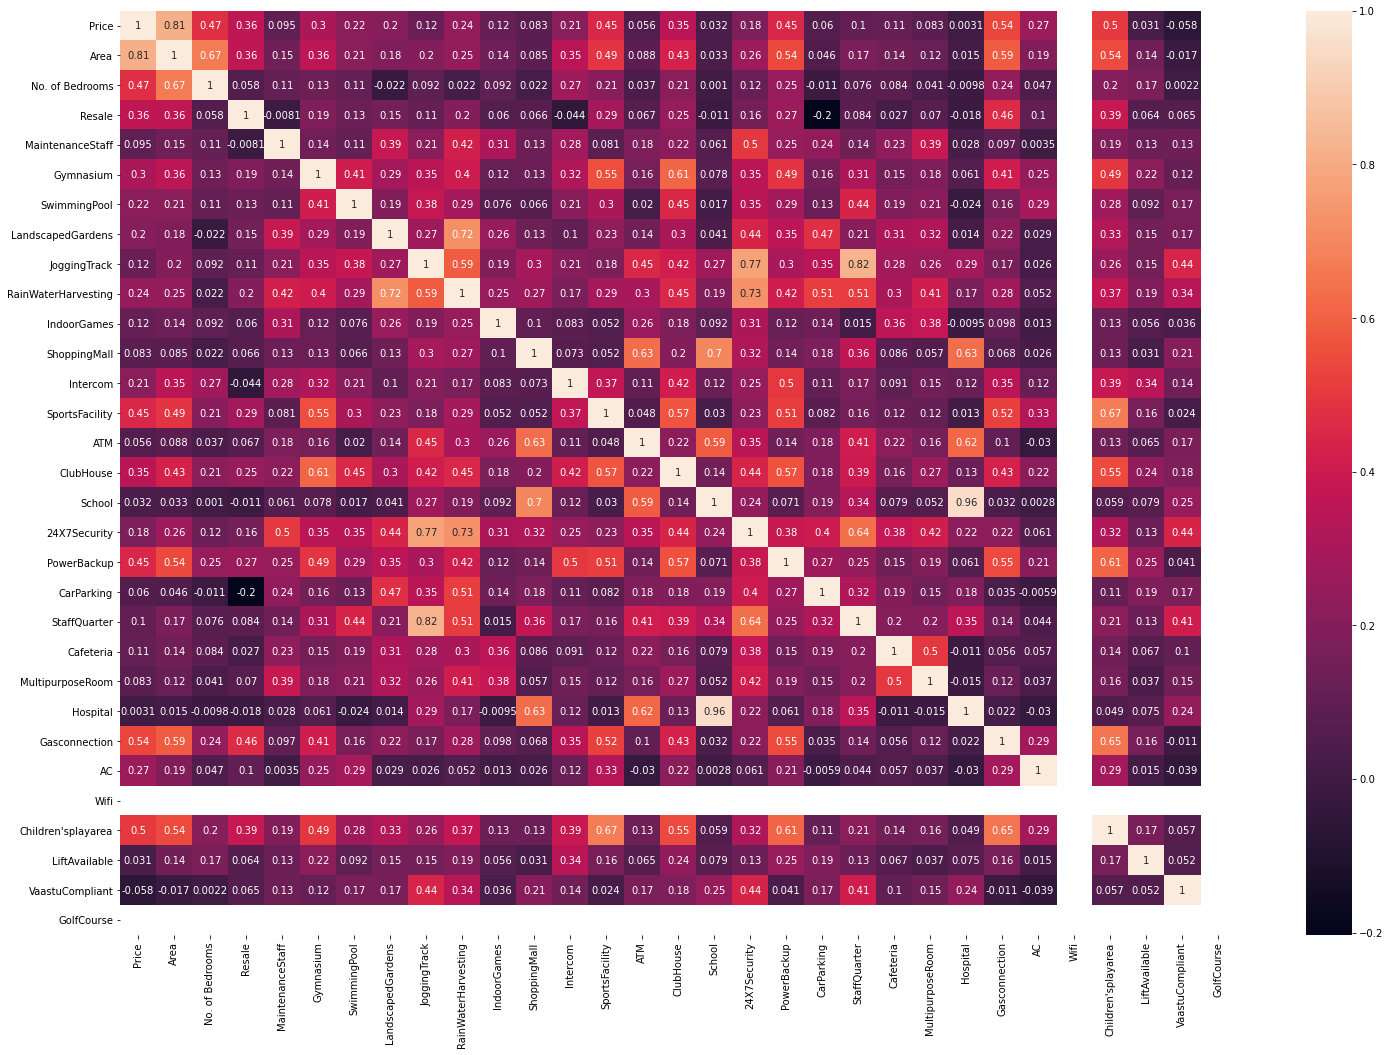

In [92]:
plt.figure(figsize=(25,17))
sns.heatmap(df_d.corr(),annot=True)

In [ ]:
# Area are price are correlated within each other.

### Multi-collinearity

In [93]:
df_num = df_d.select_dtypes(include=np.number)
df_num.head()

Price  Area  No. of Bedrooms  Resale  MaintenanceStaff  \
Location                                                                      
Sector 10 Dwarka  10500000  1200                2       1          0.000000   
Uttam Nagar        6000000  1000                3       0          0.000000   
Sarita Vihar      15000000  1350                2       1          0.000000   
Uttam Nagar        2500000   435                2       0          0.000000   
Dwarka Mor         5800000   900                3       0          0.000000   

                  Gymnasium  SwimmingPool  LandscapedGardens  JoggingTrack  \
Location                                                                     
Sector 10 Dwarka   1.000000      0.000000           0.000000      1.000000   
Uttam Nagar        0.000000      0.000000           0.000000      0.000000   
Sarita Vihar       0.000000      0.000000           0.000000      0.000000   
Uttam Nagar        0.000000      0.000000           0.000000      0.000000   
Dwarka Mor         0.000000      0.000000           0.000000      0.000000   

                  RainWaterHarvesting  IndoorGames  ShoppingMall  Intercom  \
Location                                                                     
Sector 10 Dwarka             0.000000     0.000000      0.000000  1.000000   
Uttam Nagar                  0.000000     0.000000      0.000000  1.000000   
Sarita Vihar                 0.000000     0.000000      0.000000  0.000000   
Uttam Nagar                  0.000000     0.000000      0.000000  1.000000   
Dwarka Mor                   0.000000     0.000000      0.000000  0.000000   

                  SportsFacility      ATM  ClubHouse   School  24X7Security  \
Location                                                                      
Sector 10 Dwarka        1.000000 0.000000   0.000000 0.000000      1.000000   
Uttam Nagar             0.000000 0.000000   0.000000 0.000000      0.000000   
Sarita Vihar            0.000000 0.000000   0.000000 0.000000      0.000000   
Uttam Nagar             0.000000 0.000000   0.000000 0.000000      0.000000   
Dwarka Mor              0.000000 0.000000   0.000000 0.000000      0.000000   

                  PowerBackup  CarParking  StaffQuarter  Cafeteria  \
Location                                                             
Sector 10 Dwarka     1.000000    1.000000      0.000000   0.000000   
Uttam Nagar          1.000000    1.000000      0.000000   0.000000   
Sarita Vihar         0.000000    0.000000      0.000000   0.000000   
Uttam Nagar          0.000000    1.000000      0.000000   0.000000   
Dwarka Mor           0.000000    1.000000      0.000000   0.000000   

                  MultipurposeRoom  Hospital  Gasconnection       AC     Wifi  \
Location                                                                        
Sector 10 Dwarka          0.000000  0.000000       1.000000 0.000000 0.000000   
Uttam Nagar               0.000000  0.000000       0.000000 0.000000 0.000000   
Sarita Vihar              0.000000  0.000000       0.000000 0.000000 0.000000   
Uttam Nagar               0.000000  0.000000       0.000000 0.000000 0.000000   
Dwarka Mor                0.000000  0.000000       0.000000 0.000000 0.000000   

                  Children'splayarea  LiftAvailable  VaastuCompliant  \
Location                                                               
Sector 10 Dwarka            1.000000       1.000000         1.000000   
Uttam Nagar                 0.000000       0.000000         0.000000   
Sarita Vihar                0.000000       0.000000         0.000000   
Uttam Nagar                 0.000000       0.000000         1.000000   
Dwarka Mor                  0.000000       1.000000         0.000000   

                  GolfCourse  
Location                      
Sector 10 Dwarka    0.000000  
Uttam Nagar         0.000000  
Sarita Vihar        0.000000  
Uttam Nagar         0.000000  
Dwarka Mor          0.000000

In [94]:
vif = pd.DataFrame()

In [95]:
vif['VIF'] = [VIF(df_num.values,i) for i in range(df_num.shape[1])]
vif['Features'] = df_num.columns
vif.sort_values(['VIF'],ascending=True)

VIF             Features
25  1.387966                   AC
10  1.672900          IndoorGames
21  1.725015            Cafeteria
29  1.728062      VaastuCompliant
22  1.742183     MultipurposeRoom
6   1.817279         SwimmingPool
4   1.945502     MaintenanceStaff
19  2.214697           CarParking
5   2.443902            Gymnasium
15  2.886101            ClubHouse
11  2.919541         ShoppingMall
14  2.943908                  ATM
7   2.975405    LandscapedGardens
13  3.125452       SportsFacility
12  3.309873             Intercom
18  3.672754          PowerBackup
28  3.693434        LiftAvailable
20  4.066838         StaffQuarter
24  4.142291        Gasconnection
27  4.281013   Children'splayarea
3   4.781841               Resale
9   5.045222  RainWaterHarvesting
17  5.472729         24X7Security
8   5.903697         JoggingTrack
0   7.816639                Price
2  15.672387      No. of Bedrooms
23 18.907165             Hospital
16 19.642954               School
1  27.827150                 Area
26       nan                 Wifi
30       nan           GolfCourse

In [96]:
#vif factor is null for Wifi and Golfcourse columns. and high for the columns hospital,school,area and No. of bedrooms

### DIstribution of Variables

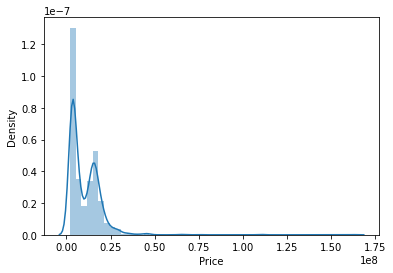

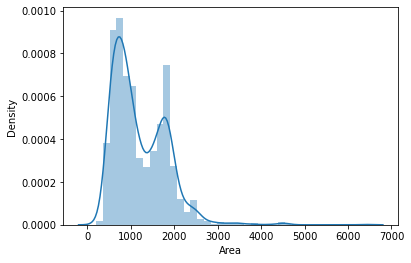

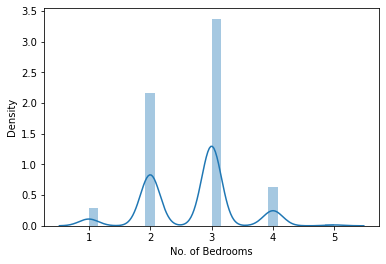

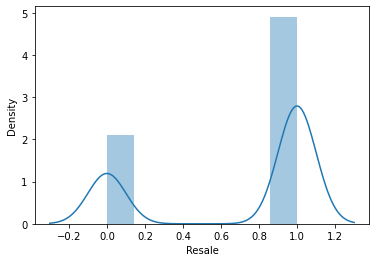

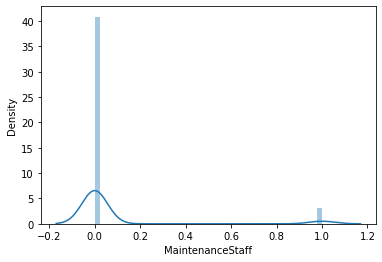

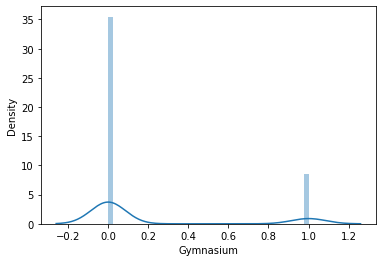

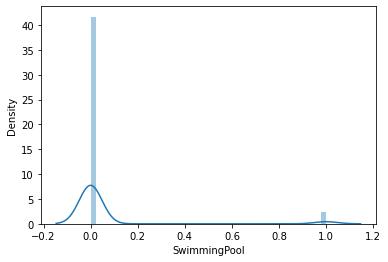

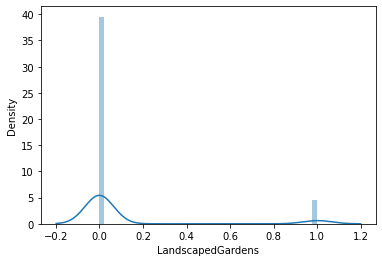

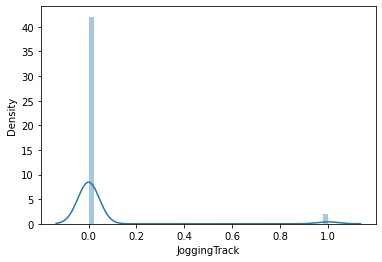

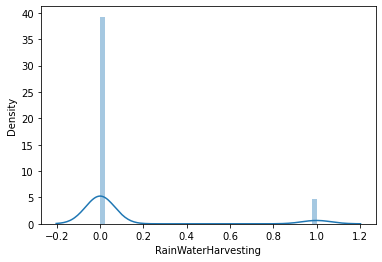

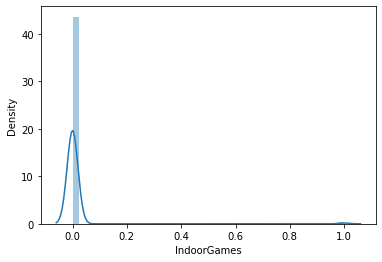

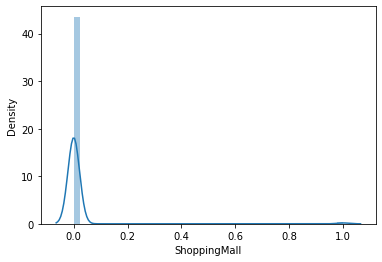

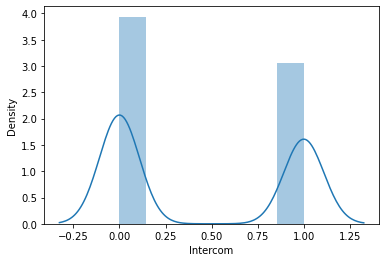

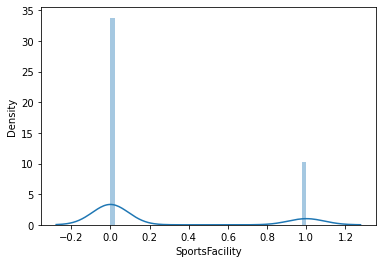

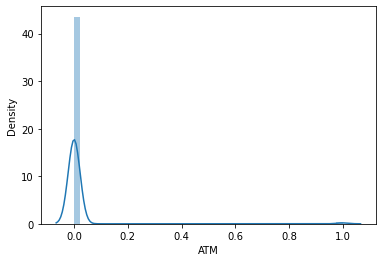

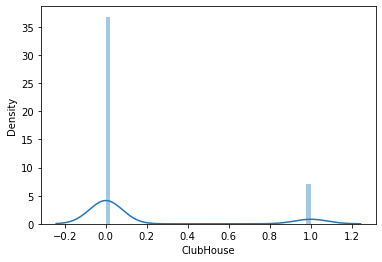

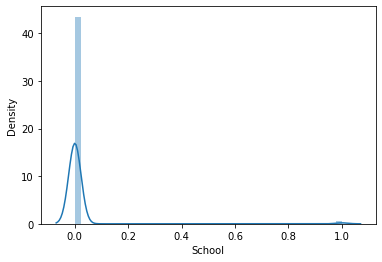

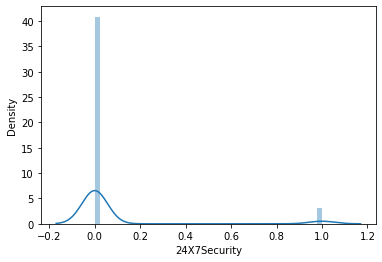

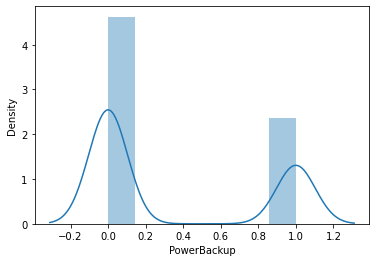

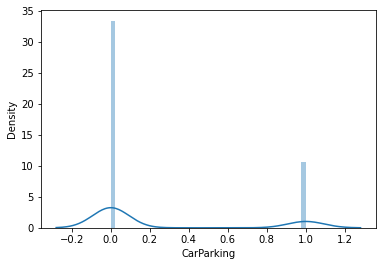

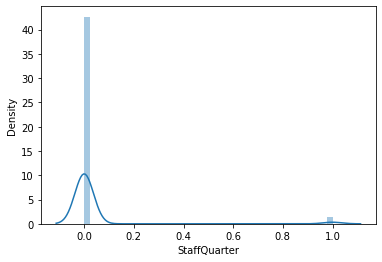

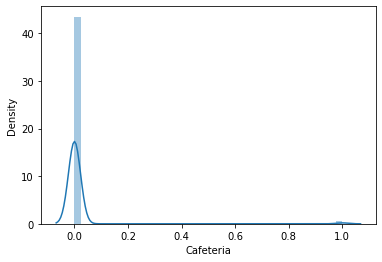

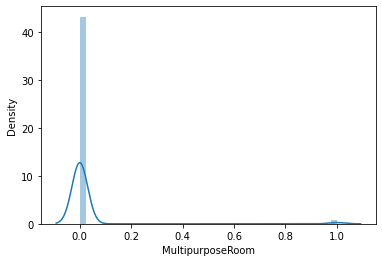

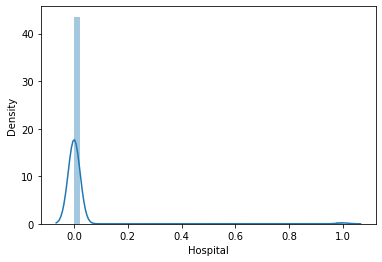

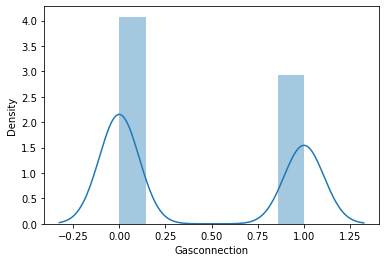

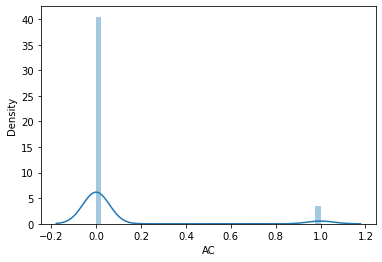

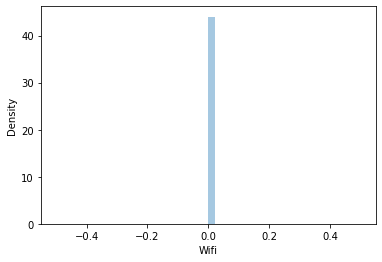

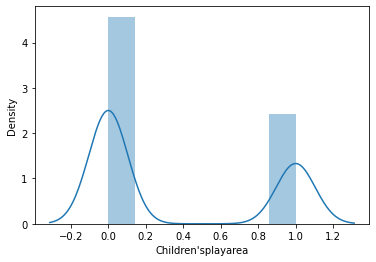

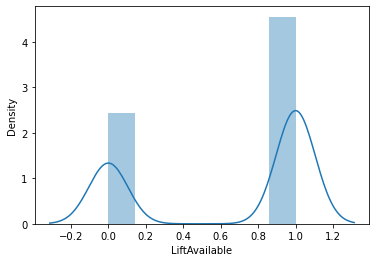

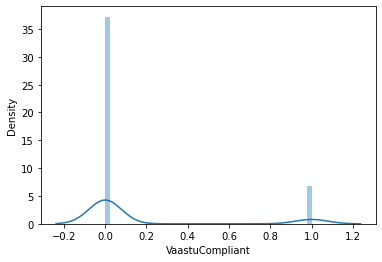

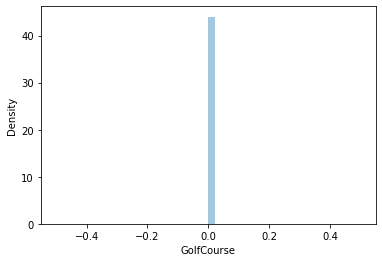

In [97]:
for i in df_d.columns:
    sns.distplot(df_d[i])
    plt.show()

In [98]:
df_d['Area'].skew() # Area column is slightly right skewed.

1.369562831798898

### Presence of Outliers and Treatment

In [99]:
df_d.shape

(2002, 31)

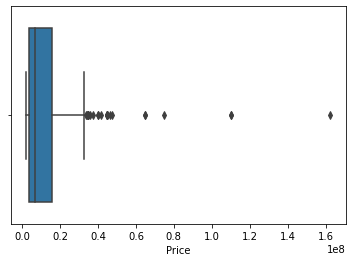

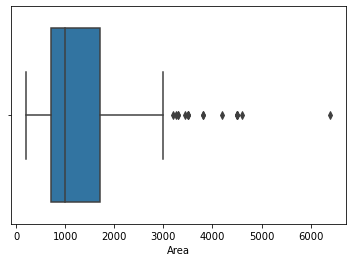

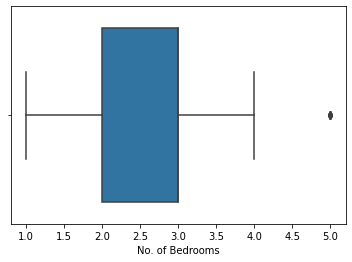

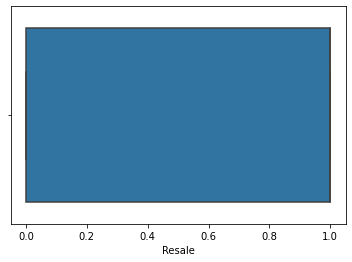

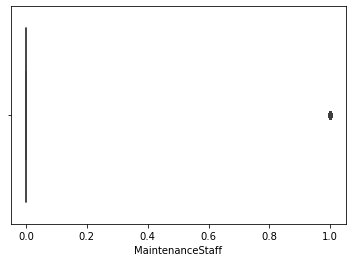

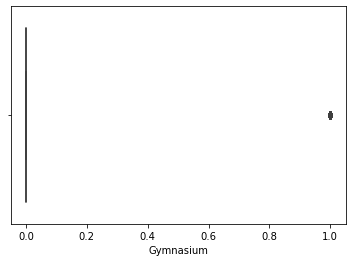

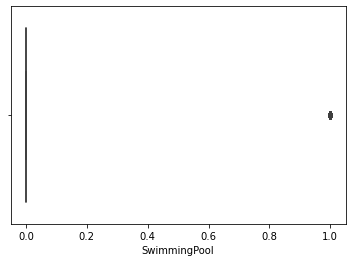

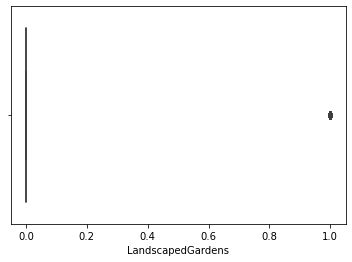

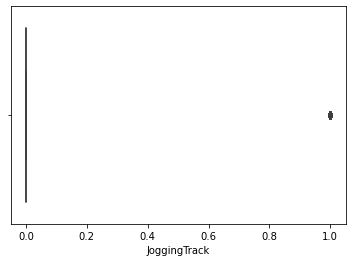

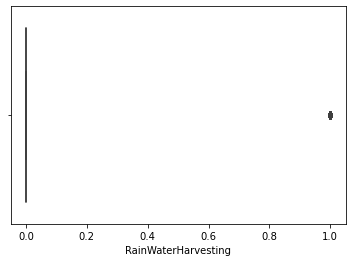

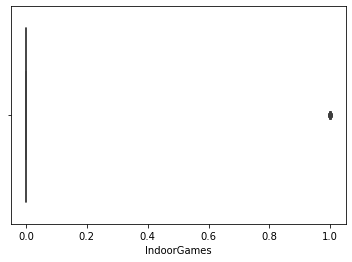

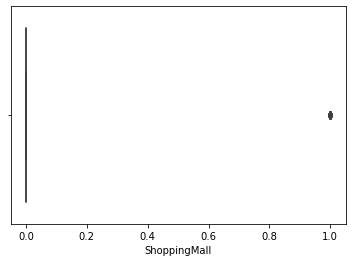

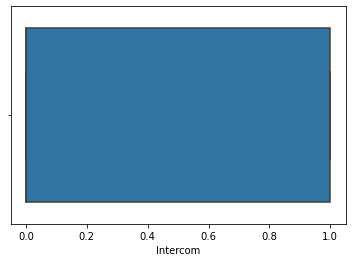

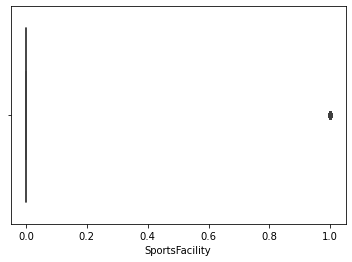

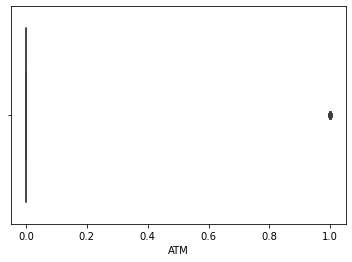

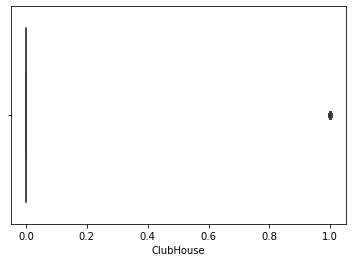

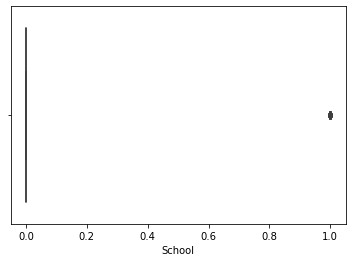

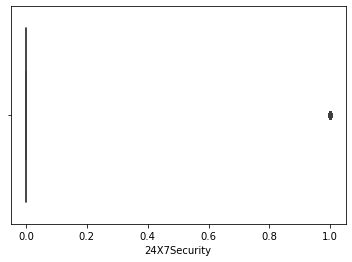

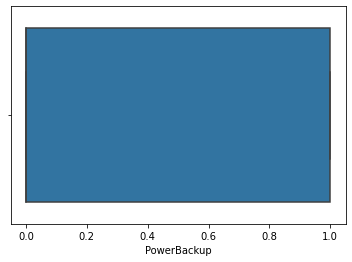

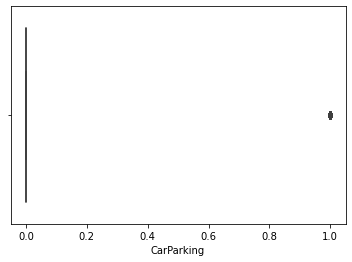

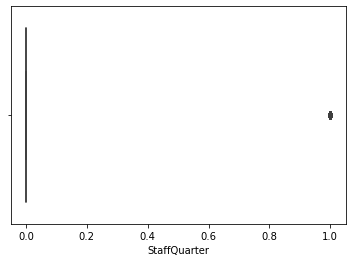

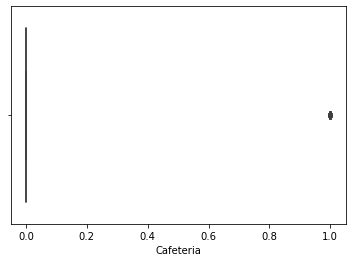

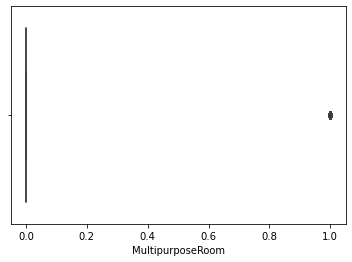

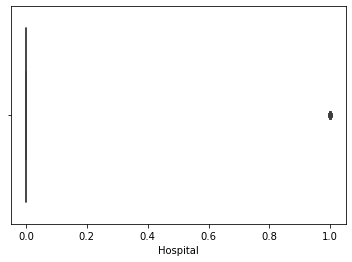

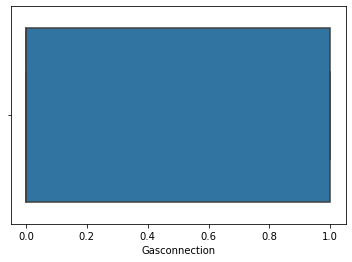

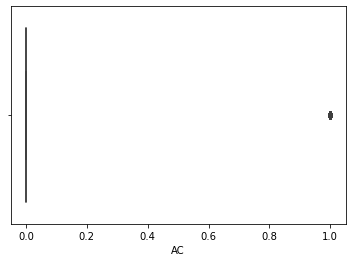

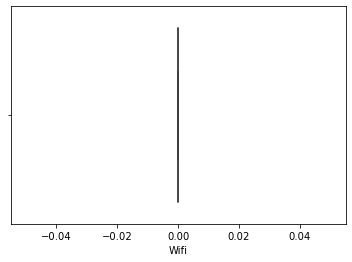

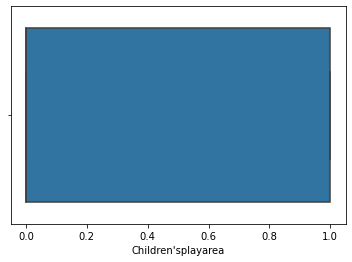

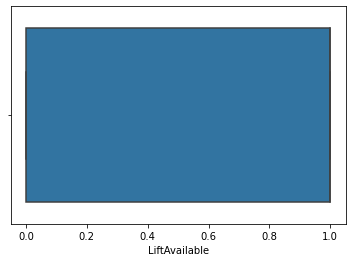

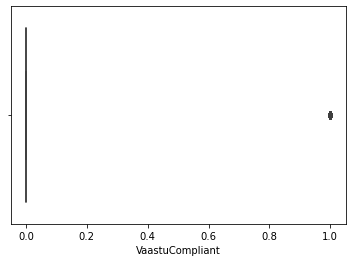

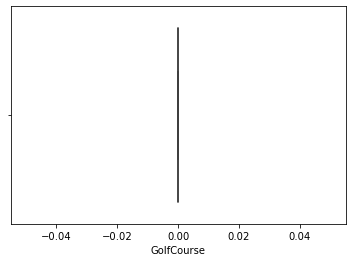

In [100]:
for i in df_d.columns:
    plt.figure()
    sns.boxplot(df_d[i])

In [101]:
# No outliers treatment necessary  due to the nature of the data.

### Statistical significance of variables

In [102]:
x = df_d.drop('Price',1)
y = df_d['Price']

In [103]:
xc = sm.add_constant(x)
ols_d = sm.OLS(y,xc).fit()

In [104]:
pvalues = pd.DataFrame()

In [105]:
pvalues['Pval'] = ols_d.pvalues

In [106]:
# Significant columns
pvalues[pvalues['Pval']<0.05] 

Pval
const               0.000000
Area                0.000000
No. of Bedrooms     0.010138
Resale              0.007736
SwimmingPool        0.000173
RainWaterHarvesting 0.000002
Intercom            0.004652
School              0.004590
24X7Security        0.000069
CarParking          0.008615
Hospital            0.022421
Gasconnection       0.026012
AC                  0.000000
Wifi                0.023737
Children'splayarea  0.029856
LiftAvailable       0.000000
VaastuCompliant     0.038677

## Feature Engineering

#### Transformation

In [107]:
df_d.skew()

Price                  4.597121
Area                   1.369563
No. of Bedrooms       -0.039031
Resale                -0.877686
MaintenanceStaff       3.316136
Gymnasium              1.550417
SwimmingPool           4.018234
LandscapedGardens      2.642986
JoggingTrack           4.423825
RainWaterHarvesting    2.538029
IndoorGames           10.721263
ShoppingMall           9.861836
Intercom               0.251909
SportsFacility         1.272309
ATM                    9.616782
ClubHouse              1.827736
School                 9.175033
24X7Security           3.316136
PowerBackup            0.679981
CarParking             1.220016
StaffQuarter           5.467713
Cafeteria              9.388460
MultipurposeRoom       6.865932
Hospital               9.616782
Gasconnection          0.334493
AC                     3.100607
Wifi                   0.000000
Children'splayarea     0.642609
LiftAvailable         -0.633362
VaastuCompliant        1.914935
GolfCourse             0.000000
dtype: f

In [108]:
#Transformation not needed due to the nature of the data.

### Feature Selection

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)

In [111]:
lr = LinearRegression()

In [112]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [113]:
bwd = sfs(estimator = lr,k_features='best',forward=False,cv=5,scoring='r2')

In [114]:
bwd_mod = bwd.fit(x_train,y_train)

In [115]:
bwd_names = bwd_mod.k_feature_names_
bwd_feat = list(bwd_names)
bwd_feat

['Area',
 'Resale',
 'MaintenanceStaff',
 'RainWaterHarvesting',
 'Intercom',
 'ClubHouse',
 'School',
 '24X7Security',
 'CarParking',
 'Cafeteria',
 'MultipurposeRoom',
 'Hospital',
 'AC',
 "Children'splayarea",
 'LiftAvailable',
 'VaastuCompliant',
 'GolfCourse']

## Assumptions

### Regression

In [116]:
x = df_d[['Area',
 'Resale',
 'MaintenanceStaff',
 'RainWaterHarvesting',
 'Intercom',
 'ClubHouse',
 'School',
 '24X7Security',
 'CarParking',
 'Cafeteria',
 'MultipurposeRoom',
 'Hospital',
 'AC',
 "Children'splayarea",
 'LiftAvailable',
 'VaastuCompliant',
 'GolfCourse']]
y = df_d['Price']

In [117]:
xc = sm.add_constant(x)
ols_d = sm.OLS(y,xc).fit()
ols_d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     302.1
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        20:42:32   Log-Likelihood:                -33689.
No. Observations:                2002   AIC:                         6.741e+04
Df Residuals:                    1985   BIC:                         6.751e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -3.695e+06   3.32e+05    -11.115      0.000   -4.35e+06   -3.04e+06
Area                  1.15e+04    230.718     49.836      0.000     1.1e+04     1.2e+04
Resale               1.253e+06      3e+05      4.179      0.000    6.65e+05    1.84e+06
MaintenanceStaff     1.945e+04   5.28e+05      0.037      0.971   -1.02e+06    1.05e+06
RainWaterHarvesting  3.685e+06   6.08e+05      6.061      0.000    2.49e+06    4.88e+06
Intercom            -7.523e+05   2.86e+05     -2.628      0.009   -1.31e+06   -1.91e+05
ClubHouse           -6.007e+05   4.05e+05     -1.483      0.138    -1.4e+06    1.94e+05
School               1.483e+07   3.71e+06      3.996      0.000    7.55e+06    2.21e+07
24X7Security         -4.01e+06   7.34e+05     -5.460      0.000   -5.45e+06   -2.57e+06
CarParking           9.431e+05    3.3e+05      2.856      0.004    2.96e+05    1.59e+06
Cafeteria           -7.239e+05    1.3e+06     -0.555      0.579   -3.28e+06    1.83e+06
MultipurposeRoom    -1.689e+06   1.01e+06     -1.671      0.095   -3.67e+06    2.93e+05
Hospital            -1.383e+07   3.89e+06     -3.552      0.000   -2.15e+07   -6.19e+06
AC                   3.515e+06   4.33e+05      8.121      0.000    2.67e+06    4.36e+06
Children'splayarea   1.156e+06   3.29e+05      3.509      0.000     5.1e+05     1.8e+06
LiftAvailable       -1.724e+06   2.55e+05     -6.764      0.000   -2.22e+06   -1.22e+06
VaastuCompliant     -9.028e+05   3.56e+05     -2.537      0.011    -1.6e+06   -2.05e+05
GolfCourse                   0          0        nan        nan           0           0
==============================================================================
Omnibus:                     3083.003   Durbin-Watson:                   1.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1856520.051
Skew:                           9.318   Prob(JB):                         0.00
Kurtosis:                     151.016   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [118]:
print('The Accuracy of the DELHI DATASET using OLS method is:' ,(ols_d.rsquared*100).round(2),'%')

The Accuracy of the DELHI DATASET using OLS method is: 70.89 %


# HYDERABAD

In [119]:
df_h = pd.read_csv('hyderabad.csv')

In [120]:
df_h = df_h.drop(['TV','DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator','WashingMachine','BED','Microwave'],axis=1)

## EVALUATING RELATIONSHIP BETWEEN ALL VARIABLES

In [121]:
df_h = df_h.replace(9,np.nan)

In [122]:
df_h.shape

(2518, 32)

In [123]:
df_h.isnull().sum()

Price                   0
Area                    0
Location                0
No. of Bedrooms         0
Resale                  0
MaintenanceStaff       84
Gymnasium              84
SwimmingPool           84
LandscapedGardens      84
JoggingTrack           84
RainWaterHarvesting    84
IndoorGames            84
ShoppingMall           84
Intercom               84
SportsFacility         84
ATM                    84
ClubHouse              84
School                 84
24X7Security           84
PowerBackup            84
CarParking             84
StaffQuarter           84
Cafeteria              84
MultipurposeRoom       84
Hospital               84
Gasconnection          84
AC                     84
Wifi                   84
Children'splayarea     84
LiftAvailable          84
VaastuCompliant        84
GolfCourse             84
dtype: int64

In [124]:
df_h = df_h.dropna(axis=0)

In [125]:
df_h.set_index('Location', inplace=True)

<AxesSubplot:>

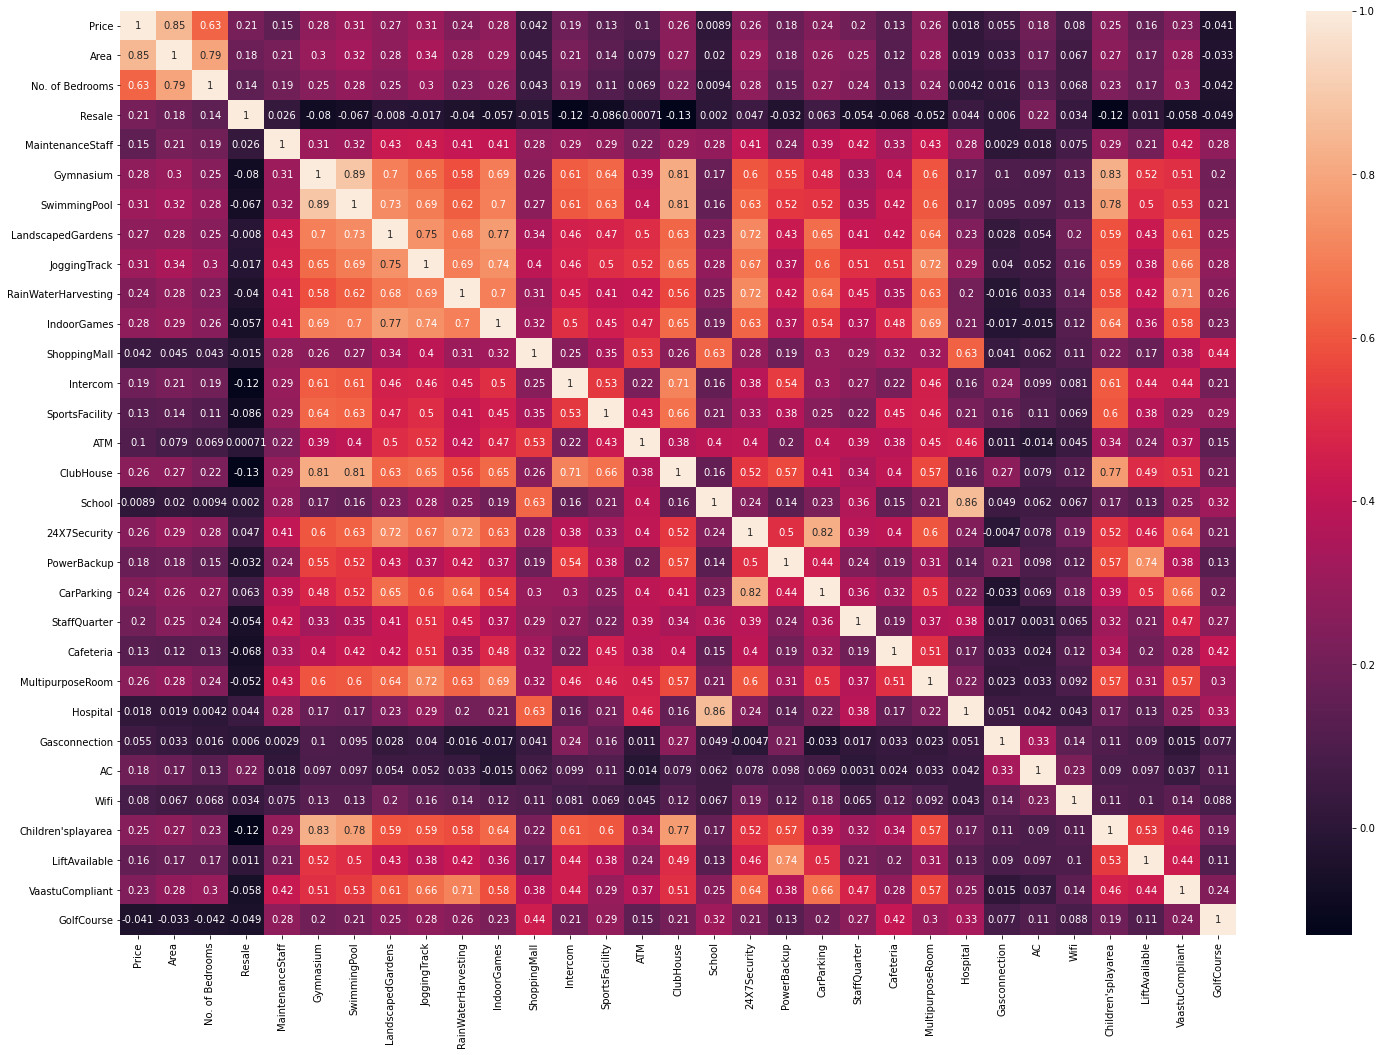

In [126]:
plt.figure(figsize=(25,17))
sns.heatmap(df_h.corr(),annot=True)

In [127]:
#For hyderabad dataset. Area and no.of bedrooms are correlated
# And No of and Area are correlated with the target variable 'price'.

### Multi-collinearity

In [128]:
df_num = df_h.select_dtypes(include=np.number)
df_num.head()

Price  Area  No. of Bedrooms  Resale  MaintenanceStaff  \
Location                                                                 
Nizampet      6968000  1340                2       0          0.000000   
Hitech City  29000000  3498                4       0          0.000000   
Manikonda     6590000  1318                2       0          0.000000   
Alwal         5739000  1295                3       1          0.000000   
Kukatpally    5679000  1145                2       0          0.000000   

             Gymnasium  SwimmingPool  LandscapedGardens  JoggingTrack  \
Location                                                                
Nizampet      1.000000      1.000000           1.000000      1.000000   
Hitech City   1.000000      1.000000           1.000000      1.000000   
Manikonda     1.000000      0.000000           0.000000      0.000000   
Alwal         0.000000      0.000000           0.000000      0.000000   
Kukatpally    0.000000      0.000000           1.000000      0.000000   

             RainWaterHarvesting  IndoorGames  ShoppingMall  Intercom  \
Location                                                                
Nizampet                1.000000     1.000000      0.000000  1.000000   
Hitech City             1.000000     1.000000      0.000000  1.000000   
Manikonda               0.000000     1.000000      0.000000  0.000000   
Alwal                   0.000000     0.000000      0.000000  0.000000   
Kukatpally              0.000000     0.000000      0.000000  0.000000   

             SportsFacility      ATM  ClubHouse   School  24X7Security  \
Location                                                                 
Nizampet           0.000000 0.000000   1.000000 0.000000      1.000000   
Hitech City        0.000000 1.000000   1.000000 0.000000      1.000000   
Manikonda          0.000000 0.000000   0.000000 0.000000      0.000000   
Alwal              0.000000 0.000000   0.000000 0.000000      0.000000   
Kukatpally         0.000000 0.000000   0.000000 0.000000      0.000000   

             PowerBackup  CarParking  StaffQuarter  Cafeteria  \
Location                                                        
Nizampet        1.000000    1.000000      0.000000   0.000000   
Hitech City     1.000000    1.000000      1.000000   0.000000   
Manikonda       0.000000    0.000000      0.000000   0.000000   
Alwal           1.000000    0.000000      0.000000   0.000000   
Kukatpally      1.000000    1.000000      0.000000   0.000000   

             MultipurposeRoom  Hospital  Gasconnection       AC     Wifi  \
Location                                                                   
Nizampet             1.000000  0.000000       0.000000 0.000000 0.000000   
Hitech City          1.000000  0.000000       0.000000 0.000000 0.000000   
Manikonda            1.000000  0.000000       0.000000 0.000000 0.000000   
Alwal                0.000000  0.000000       0.000000 0.000000 0.000000   
Kukatpally           0.000000  0.000000       0.000000 0.000000 0.000000   

             Children'splayarea  LiftAvailable  VaastuCompliant  GolfCourse  
Location                                                                     
Nizampet               1.000000       1.000000         1.000000    0.000000  
Hitech City            1.000000       1.000000         1.000000    0.000000  
Manikonda              1.000000       0.000000         0.000000    0.000000  
Alwal                  0.000000       1.000000         0.000000    0.000000  
Kukatpally             1.000000       1.000000         0.000000    0.000000

In [129]:
vif = pd.DataFrame()

In [130]:
vif['VIF'] = [VIF(df_num.values,i) for i in range(df_num.shape[1])]
vif['Features'] = df_num.columns
vif.sort_values(['VIF'],ascending=True)

VIF             Features
26  1.169785                 Wifi
25  1.365890                   AC
24  1.537605        Gasconnection
3   1.545807               Resale
30  1.724699           GolfCourse
4   1.794723     MaintenanceStaff
20  1.981290         StaffQuarter
21  2.211840            Cafeteria
14  2.662836                  ATM
11  2.710103         ShoppingMall
13  3.476252       SportsFacility
22  3.608260     MultipurposeRoom
12  4.022660             Intercom
29  4.332872      VaastuCompliant
16  4.387397               School
23  4.588737             Hospital
9   5.136591  RainWaterHarvesting
8   5.540119         JoggingTrack
10  5.583437          IndoorGames
7   6.030663    LandscapedGardens
19  7.164464           CarParking
27  7.774599   Children'splayarea
0   8.137794                Price
17  8.414329         24X7Security
18  8.570771          PowerBackup
28  8.710823        LiftAvailable
15  9.190026            ClubHouse
6  10.720147         SwimmingPool
5  12.264076            Gymnasium
2  21.935224      No. of Bedrooms
1  36.153242                 Area

In [131]:
#Gymnasium and No.of Bedrooms,Area have high vif > 10.

### Distribution of Variables

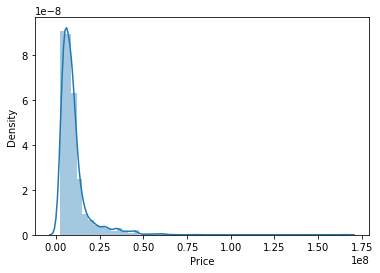

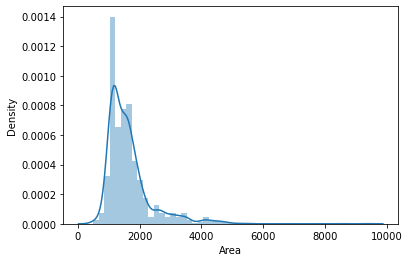

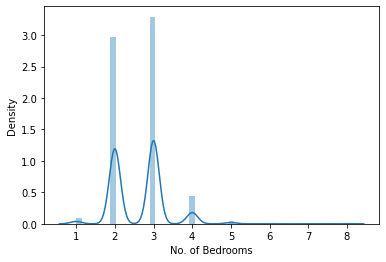

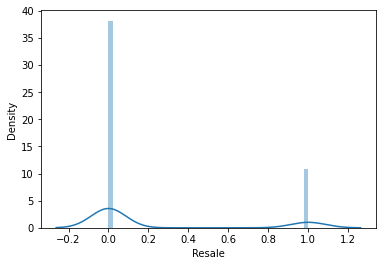

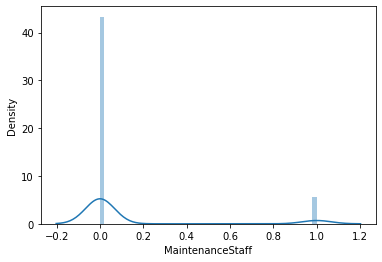

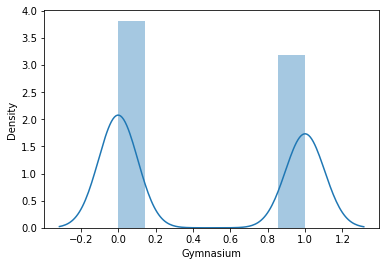

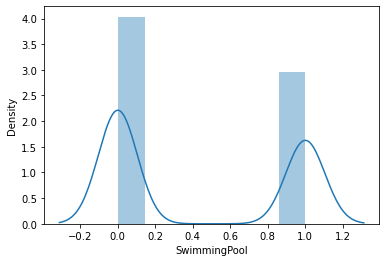

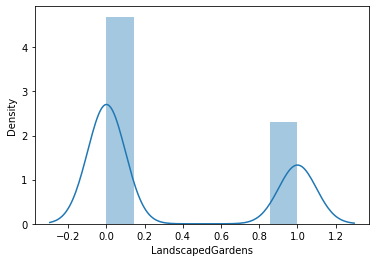

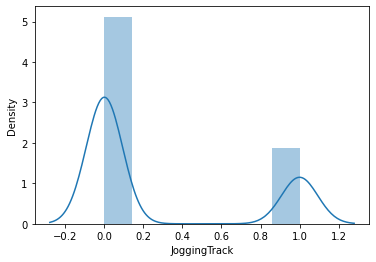

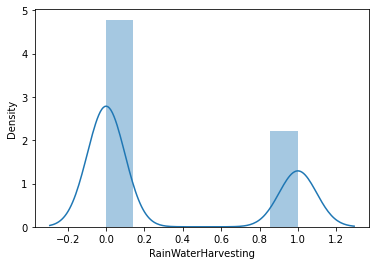

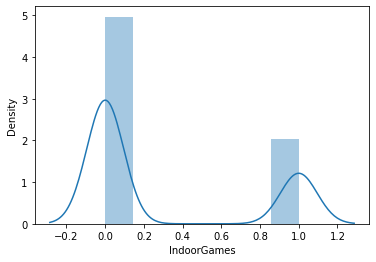

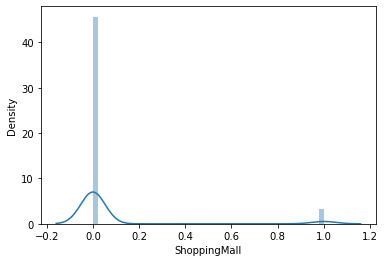

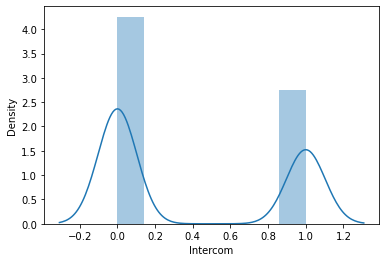

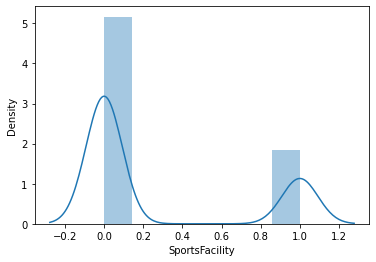

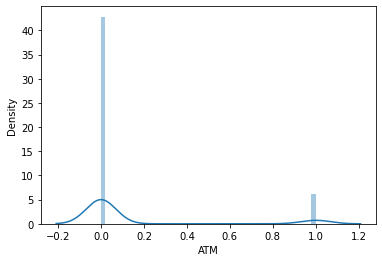

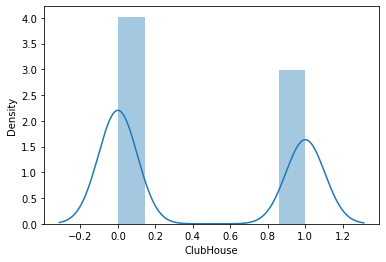

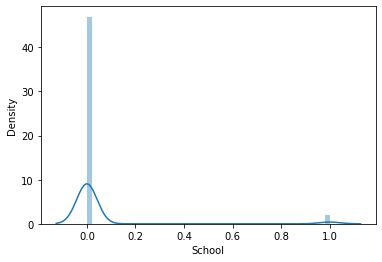

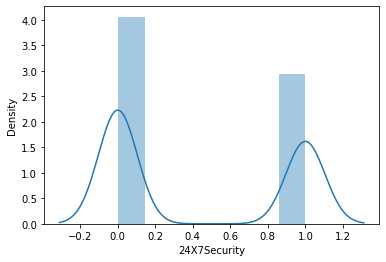

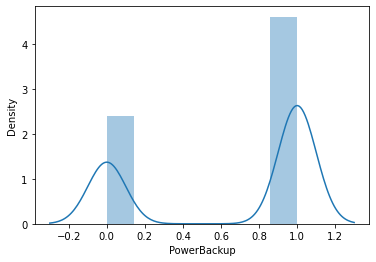

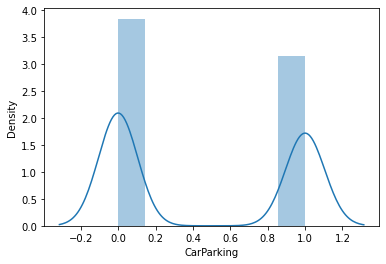

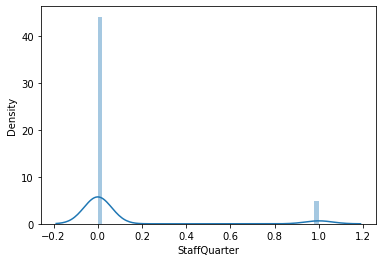

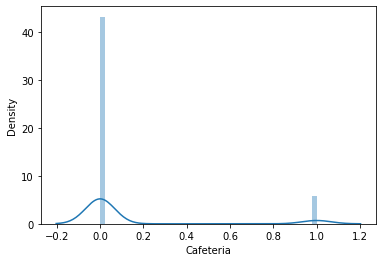

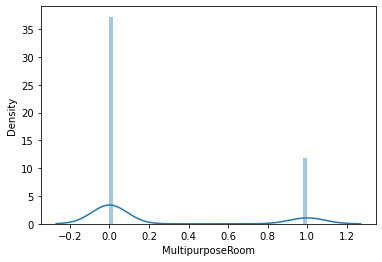

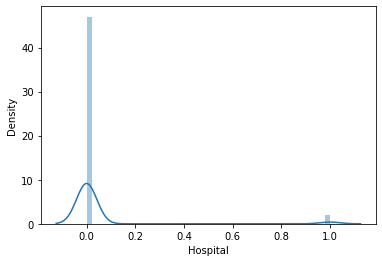

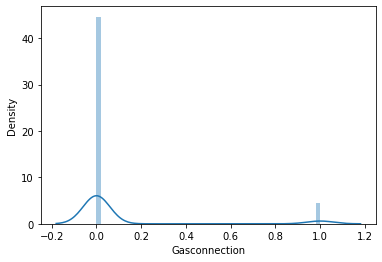

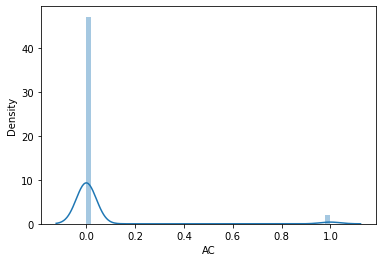

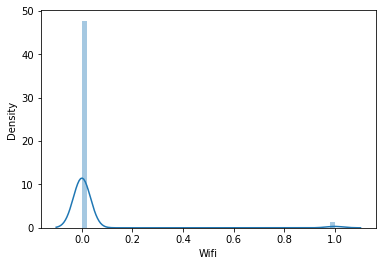

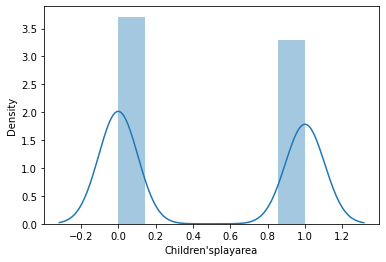

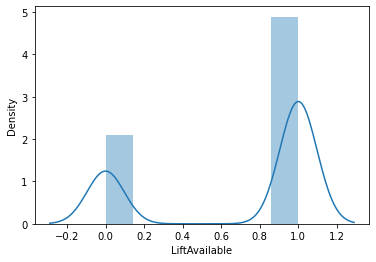

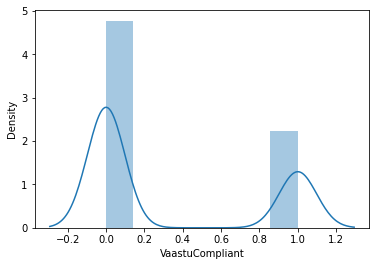

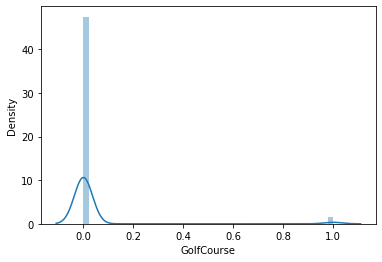

In [132]:
for i in df_h.columns:
    sns.distplot(df_h[i])
    plt.show()

In [133]:
df_h['Area'].skew() # slightly right skewed.

2.7745072708361316

### Presence of Outliers and Treatment

In [134]:
df_h.shape

(2434, 31)

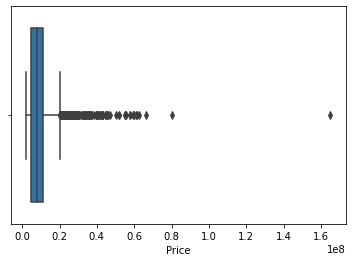

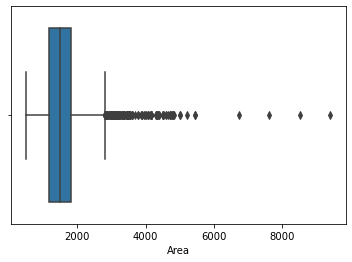

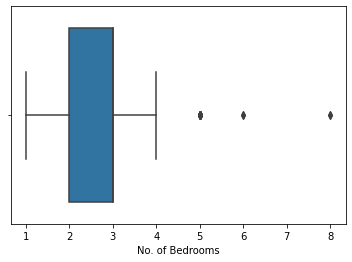

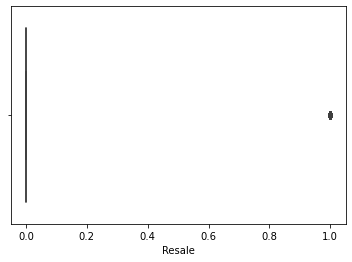

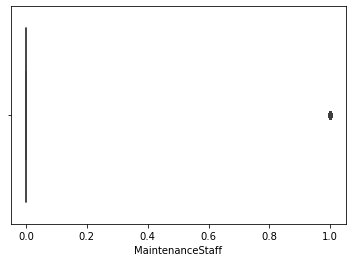

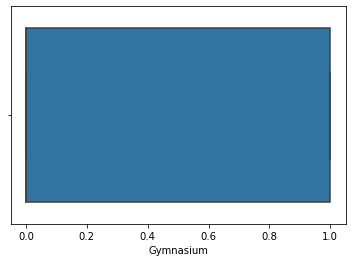

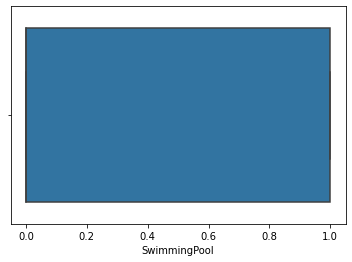

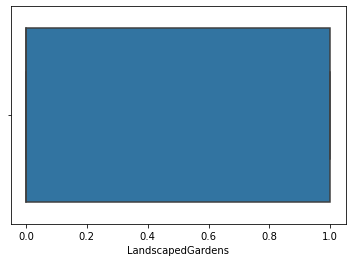

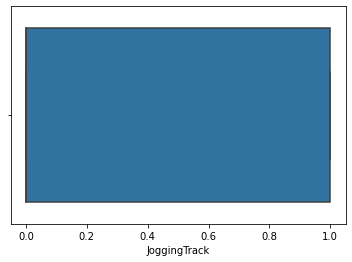

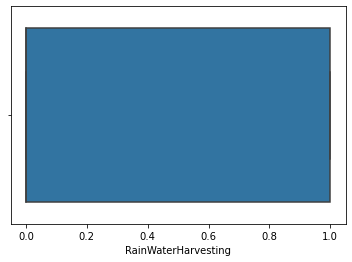

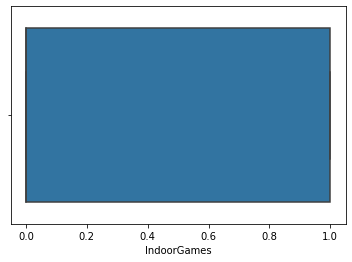

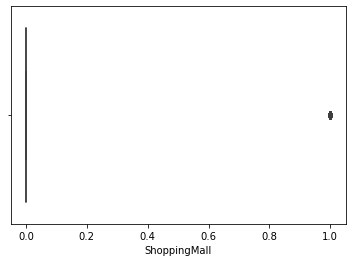

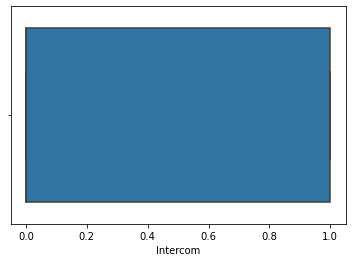

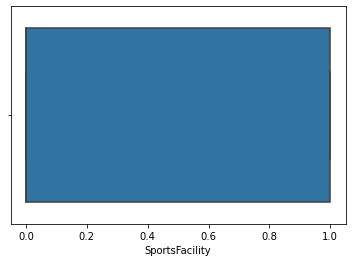

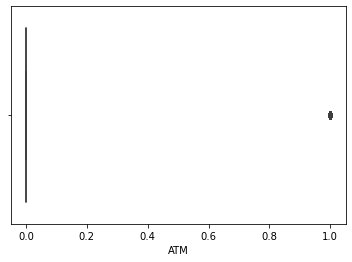

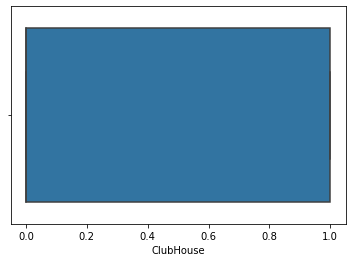

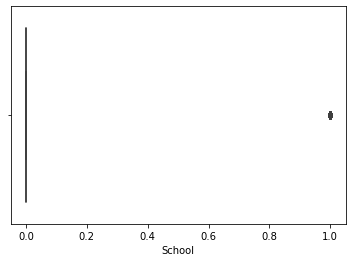

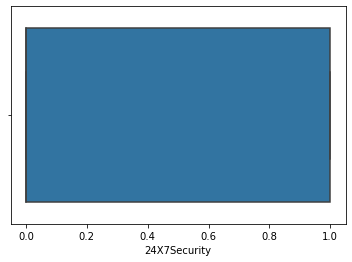

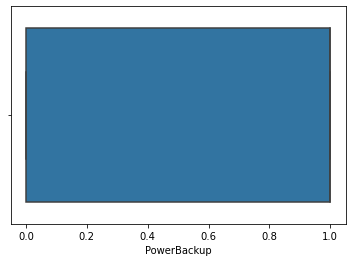

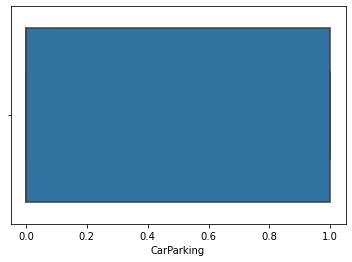

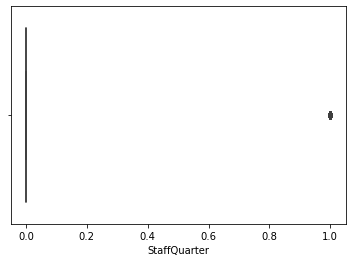

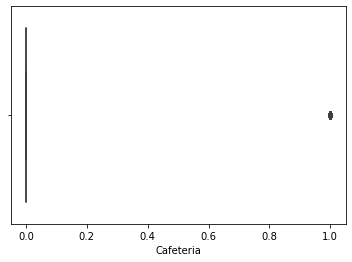

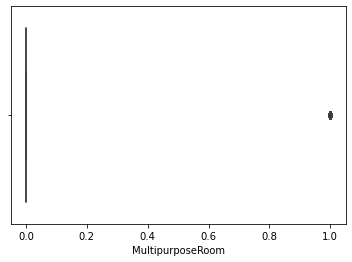

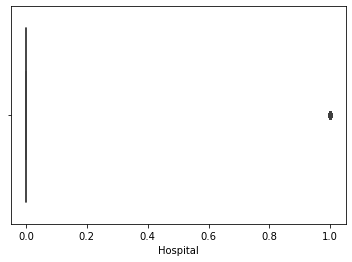

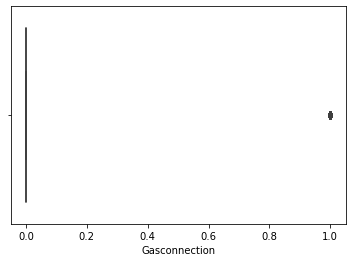

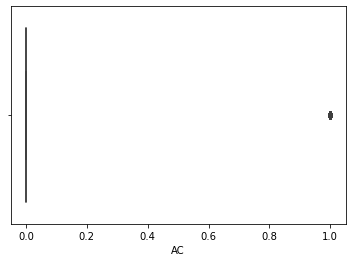

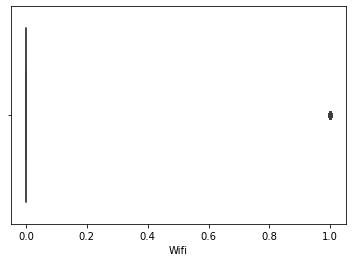

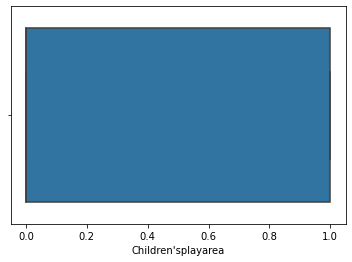

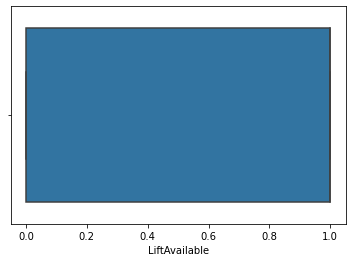

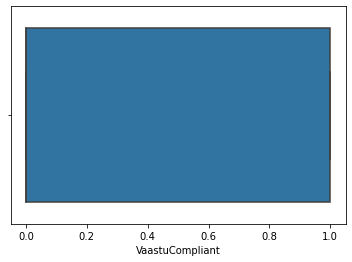

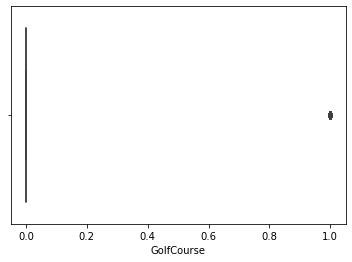

In [135]:
for i in df_h.columns:
    plt.figure()
    sns.boxplot(df_h[i])

In [136]:
# No outliers treatment necessary  due to the nature of the data.

### Statistical significance of variables

In [137]:
x = df_h.drop('Price',1)
y = df_h['Price']

In [138]:
xc = sm.add_constant(x)
ols_h = sm.OLS(y,xc).fit()

In [139]:
pvalues = pd.DataFrame()

In [140]:
pvalues['Pval'] = ols_h.pvalues

In [141]:
# Significant columns
pvalues[pvalues['Pval']<0.05] 

Pval
const             0.000000
Area              0.000000
No. of Bedrooms   0.000000
Resale            0.000000
MaintenanceStaff  0.001522
Gymnasium         0.044720
LandscapedGardens 0.038922
IndoorGames       0.048125
24X7Security      0.012345
Cafeteria         0.032414
AC                0.036869
GolfCourse        0.049695

## Feature Engineering

#### Transformation

In [142]:
df_h.skew()

Price                  4.668390
Area                   2.774507
No. of Bedrooms        0.890345
Resale                 1.342544
MaintenanceStaff       2.395693
Gymnasium              0.181627
SwimmingPool           0.309494
LandscapedGardens      0.723958
JoggingTrack           1.044257
RainWaterHarvesting    0.788242
IndoorGames            0.925858
ShoppingMall           3.427875
Intercom               0.442944
SportsFacility         1.082462
ATM                    2.259278
ClubHouse              0.300984
School                 4.575181
24X7Security           0.323146
PowerBackup           -0.663519
CarParking             0.196626
StaffQuarter           2.694439
Cafeteria              2.383269
MultipurposeRoom       1.218735
Hospital               4.627011
Gasconnection          2.876406
AC                     4.707611
Wifi                   5.875043
Children'splayarea     0.121911
LiftAvailable         -0.867439
VaastuCompliant        0.784163
GolfCourse             5.433370
dtype: f

In [143]:
#Transformation not needed due to the nature of the data.

### Feature Selection

In [144]:
x = df_h.drop('Price',1)
y = df_h['Price']

In [145]:
from sklearn.model_selection import train_test_split

In [146]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)

In [147]:
lr = LinearRegression()

In [148]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [149]:
bwd = sfs(estimator = lr,k_features='best',forward=False,cv=5,scoring='r2')

In [150]:
bwd_mod = bwd.fit(x_train,y_train)

In [151]:
bwd_names = bwd_mod.k_feature_names_
bwd_feat = list(bwd_names)
bwd_feat

['Area',
 'No. of Bedrooms',
 'Resale',
 'MaintenanceStaff',
 'Gymnasium',
 'SwimmingPool',
 'RainWaterHarvesting',
 'IndoorGames',
 'SportsFacility',
 'ClubHouse',
 '24X7Security',
 'CarParking',
 'Cafeteria',
 'MultipurposeRoom',
 'Gasconnection',
 'AC',
 "Children'splayarea",
 'GolfCourse']

## Assumptions

### Regression

In [152]:
x = df_d[['Area',
 'No. of Bedrooms',
 'Resale',
 'MaintenanceStaff',
 'Gymnasium',
 'SwimmingPool',
 'RainWaterHarvesting',
 'IndoorGames',
 'SportsFacility',
 'ClubHouse',
 '24X7Security',
 'CarParking',
 'Cafeteria',
 'MultipurposeRoom',
 'Gasconnection',
 'AC',
 "Children'splayarea",
 'GolfCourse']]
y = df_d['Price']

In [153]:
xc = sm.add_constant(x)
ols_h = sm.OLS(y,xc).fit()
ols_h.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     272.8
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        20:42:50   Log-Likelihood:                -33718.
No. Observations:                2002   AIC:                         6.747e+04
Df Residuals:                    1984   BIC:                         6.757e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -3.195e+06    5.1e+05     -6.267      0.000   -4.19e+06    -2.2e+06
Area                 1.221e+04    332.650     36.704      0.000    1.16e+04    1.29e+04
No. of Bedrooms     -9.133e+05   2.25e+05     -4.061      0.000   -1.35e+06   -4.72e+05
Resale               9.968e+05   3.07e+05      3.242      0.001    3.94e+05     1.6e+06
MaintenanceStaff     -2.31e+05   5.32e+05     -0.435      0.664   -1.27e+06    8.12e+05
Gymnasium           -7.642e+05   3.94e+05     -1.939      0.053   -1.54e+06    8602.811
SwimmingPool         2.091e+06   6.09e+05      3.433      0.001    8.97e+05    3.29e+06
RainWaterHarvesting  3.411e+06   6.21e+05      5.494      0.000    2.19e+06    4.63e+06
IndoorGames          2.841e+06   1.39e+06      2.047      0.041     1.2e+05    5.56e+06
SportsFacility       1.562e+05   4.06e+05      0.385      0.700    -6.4e+05    9.52e+05
ClubHouse            -1.42e+06   4.55e+05     -3.121      0.002   -2.31e+06   -5.28e+05
24X7Security        -4.577e+06    7.1e+05     -6.447      0.000   -5.97e+06   -3.18e+06
CarParking           6.346e+05   3.32e+05      1.913      0.056   -1.61e+04    1.29e+06
Cafeteria           -1.201e+05   1.31e+06     -0.091      0.927    -2.7e+06    2.46e+06
MultipurposeRoom    -1.607e+06   1.03e+06     -1.555      0.120   -3.63e+06     4.2e+05
Gasconnection        4.335e+05   3.43e+05      1.263      0.207    -2.4e+05    1.11e+06
AC                   3.386e+06    4.6e+05      7.361      0.000    2.48e+06    4.29e+06
Children'splayarea   6.103e+05   3.83e+05      1.594      0.111   -1.41e+05    1.36e+06
GolfCourse                   0          0        nan        nan           0           0
==============================================================================
Omnibus:                     2959.443   Durbin-Watson:                   1.772
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1460177.985
Skew:                           8.641   Prob(JB):                         0.00
Kurtosis:                     134.171   Cond. No.                          inf
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [154]:
print('The Accuracy of the HYDERABAD DATASET using OLS method is:' ,(ols_h.rsquared*100).round(2),'%')

The Accuracy of the HYDERABAD DATASET using OLS method is: 70.03 %


# KOLKATA

In [155]:
df_k = pd.read_csv('Kolkata.csv')

In [156]:
df_k = df_k.drop(['TV','DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator','WashingMachine','BED','Microwave'],axis=1)

In [157]:
df_k = df_k.replace(9,np.nan)

## EVALUATING RELATIONSHIP BETWEEN ALL VARIABLES

In [158]:
df_k.shape

(6507, 32)

In [159]:
df_k.isnull().sum()

Price                     0
Area                      0
Location                  0
No. of Bedrooms           1
Resale                    0
MaintenanceStaff       6432
Gymnasium              6432
SwimmingPool           6432
LandscapedGardens      6432
JoggingTrack           6432
RainWaterHarvesting    6432
IndoorGames            6432
ShoppingMall           6432
Intercom               6432
SportsFacility         6432
ATM                    6432
ClubHouse              6432
School                 6432
24X7Security           6432
PowerBackup            6432
CarParking             6432
StaffQuarter           6432
Cafeteria              6432
MultipurposeRoom       6432
Hospital               6432
Gasconnection          6432
AC                     6432
Wifi                   6432
Children'splayarea     6432
LiftAvailable          6432
VaastuCompliant        6432
GolfCourse             6432
dtype: int64

In [160]:
df_k['No. of Bedrooms'] = df_k['No. of Bedrooms'].fillna(df_k['No. of Bedrooms'].median())

In [161]:
df_k = df_k.dropna(axis=1)

In [162]:
df_k.set_index('Location', inplace=True)

<AxesSubplot:>

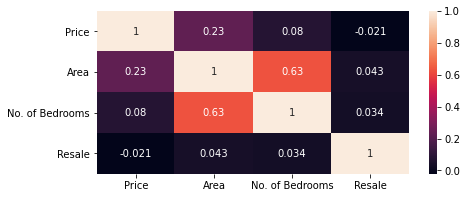

In [163]:
plt.figure(figsize=(7,3))
sns.heatmap(df_k.corr(),annot=True)

In [1]:
# Area and no of bedroom are correlated.

### Multi-collinearity

In [164]:
df_num = df_k.select_dtypes(include=np.number)
df_num.head()

Price  Area  No. of Bedrooms  Resale
Location                                           
Barasat      2235000  1016         3.000000       0
Keshtopur    3665999  1111         2.000000       0
Rajarhat     3774000  1020         2.000000       0
Narendrapur  2524000   935         2.000000       0
New Town     8300000  1956         3.000000       1

In [165]:
vif = pd.DataFrame()

In [166]:
vif['VIF'] = [VIF(df_num.values,i) for i in range(df_num.shape[1])]
vif['Features'] = df_num.columns
vif.sort_values(['VIF'],ascending=True)

VIF         Features
0 1.402049            Price
3 1.426129           Resale
1 6.241858             Area
2 6.412335  No. of Bedrooms

In [167]:
#VIF is within acceptable range.

### DIstribution of Variables

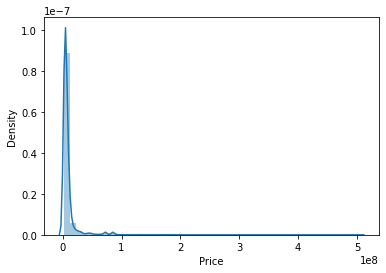

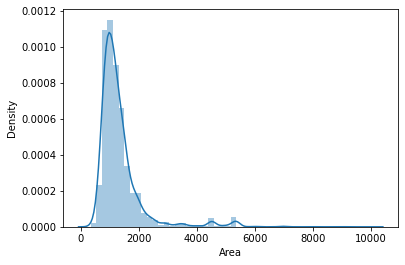

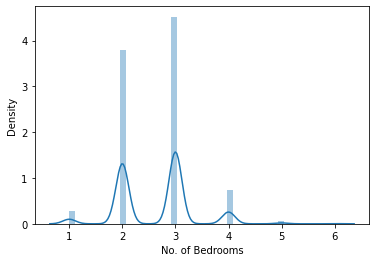

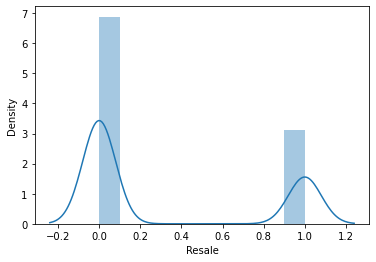

In [168]:
for i in df_k.columns:
    sns.distplot(df_k[i])
    plt.show()

### Presence of Outliers and Treatment

In [169]:
df_k.shape

(6507, 4)

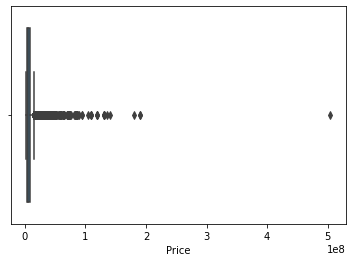

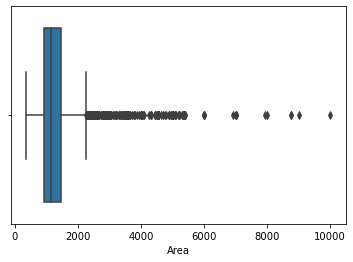

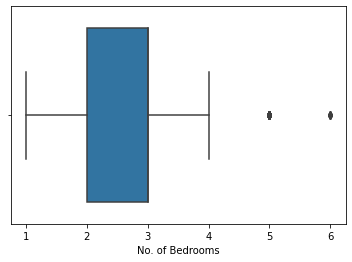

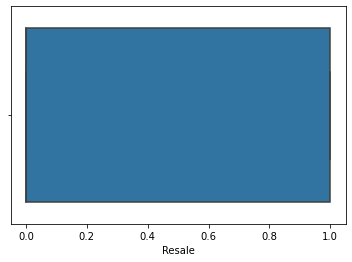

In [170]:
for i in df_k.columns:
    plt.figure()
    sns.boxplot(df_k[i])

In [171]:
# No outliers treatment necessary due to the nature of the data.

### Statistical significance of variables

In [172]:
x = df_k.drop('Price',1)
y = df_k['Price']

In [173]:
xc = sm.add_constant(x)
ols_k = sm.OLS(y,xc).fit()

In [174]:
pvalues = pd.DataFrame()

In [175]:
pvalues['Pval'] = ols_k.pvalues

In [176]:
# Significant columns
pvalues[pvalues['Pval']<0.05] 

Pval
const           0.000000
Area            0.000000
No. of Bedrooms 0.000000
Resale          0.012809

## Feature Engineering

#### Transformation

In [177]:
df_k.skew()

Price             10.059830
Area               3.674477
No. of Bedrooms    0.334398
Resale             0.812654
dtype: float64

In [178]:
#Transformation not needed due to the nature of the data.

### Feature Selection

In [179]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)

In [180]:
lr = LinearRegression()

In [181]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [182]:
bwd = sfs(estimator = lr,k_features='best',forward=False,cv=5,scoring='r2')

In [183]:
bwd_mod = bwd.fit(x_train,y_train)

In [184]:
bwd_names = bwd_mod.k_feature_names_
bwd_feat = list(bwd_names)
bwd_feat

['Area', 'No. of Bedrooms', 'Resale']

## Assumptions

### Regression

In [185]:
x = df_k[['Area', 'No. of Bedrooms', 'Resale']]
y = df_k['Price']

In [186]:
xc = sm.add_constant(x)
ols_k = sm.OLS(y,xc).fit()
ols_k.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     144.8
Date:                Thu, 05 Aug 2021   Prob (F-statistic):           8.18e-91
Time:                        20:42:52   Log-Likelihood:            -1.1639e+05
No. Observations:                6507   AIC:                         2.328e+05
Df Residuals:                    6503   BIC:                         2.328e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            7.433e+06   7.02e+05     10.590      0.000    6.06e+06    8.81e+06
Area             5524.0701    281.127     19.650      0.000    4972.968    6075.172
No. of Bedrooms -2.302e+06   3.21e+05     -7.179      0.000   -2.93e+06   -1.67e+06
Resale          -9.468e+05    3.8e+05     -2.490      0.013   -1.69e+06   -2.01e+05
==============================================================================
Omnibus:                    10603.888   Durbin-Watson:                   1.166
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         17731482.928
Skew:                          10.359   Prob(JB):                         0.00
Kurtosis:                     257.893   Cond. No.                     6.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [187]:
print('The Accuracy of the Kolkata DATASET using OLS method is:' ,(ols_k.rsquared*100).round(2),'%')

The Accuracy of the Kolkata DATASET using OLS method is: 6.26 %


In [188]:
#Accuracy is very low

# MUMBAI

In [189]:
df_m = pd.read_csv('Mumbai.csv')

In [190]:
df_m = df_m.replace(9,np.nan)

## EVALUATING RELATIONSHIP BETWEEN ALL VARIABLES

In [191]:
df_m.shape

(7719, 40)

In [192]:
df_m.isnull().sum()

Price                     0
Area                      0
Location                  0
No. of Bedrooms           0
Resale                    0
MaintenanceStaff       6321
Gymnasium              6321
SwimmingPool           6321
LandscapedGardens      6321
JoggingTrack           6321
RainWaterHarvesting    6321
IndoorGames            6321
ShoppingMall           6321
Intercom               6321
SportsFacility         6321
ATM                    6321
ClubHouse              6321
School                 6321
24X7Security           6321
PowerBackup            6321
CarParking             6321
StaffQuarter           6321
Cafeteria              6321
MultipurposeRoom       6321
Hospital               6321
WashingMachine         6321
Gasconnection          6321
AC                     6321
Wifi                   6321
Children'splayarea     6321
LiftAvailable          6321
BED                    6321
VaastuCompliant        6321
Microwave              6321
GolfCourse             6321
TV                  

In [193]:
df_m = df_m.dropna(axis=1)

In [194]:
df_m.set_index('Location', inplace=True)

<AxesSubplot:>

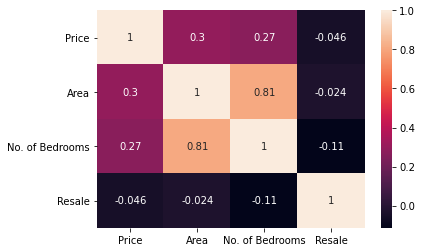

In [195]:
sns.heatmap(df_m.corr(),annot=True)

In [196]:
#Area and no of bedrooms are correlated.

### Multi-collinearity

In [197]:
df_num = df_m.select_dtypes(include=np.number)
df_num.head()

Price  Area  No. of Bedrooms  Resale
Location                                        
Kharghar  4850000   720                1       1
Kharghar  4500000   600                1       1
Kharghar  6700000   650                1       1
Kharghar  4500000   650                1       1
Kharghar  5000000   665                1       1

In [198]:
vif = pd.DataFrame()

In [199]:
vif['VIF'] = [VIF(df_num.values,i) for i in range(df_num.shape[1])]
vif['Features'] = df_num.columns
vif.sort_values(['VIF'],ascending=True)

VIF         Features
0  1.689949            Price
3  2.017756           Resale
1 12.823755             Area
2 13.027827  No. of Bedrooms

### DIstribution of Variables

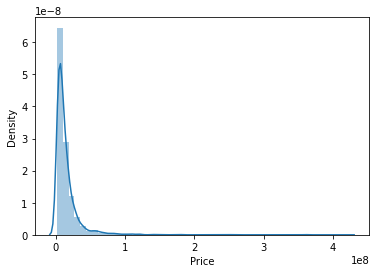

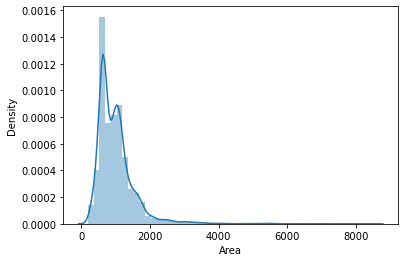

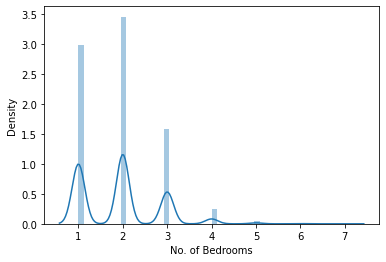

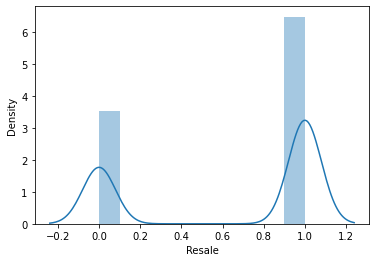

In [200]:
for i in df_m.columns:
    sns.distplot(df_m[i])
    plt.show()

### Presence of Outliers and Treatment

In [201]:
df_m.shape

(7719, 4)

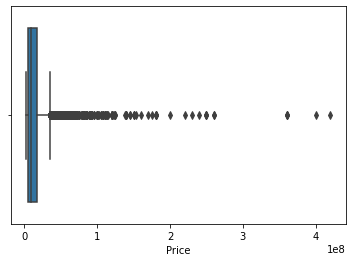

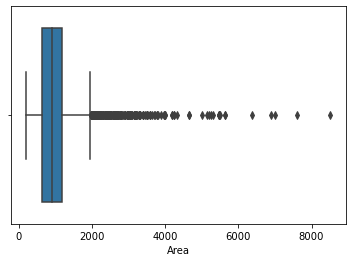

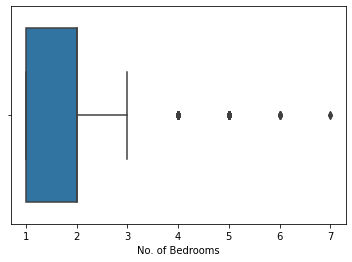

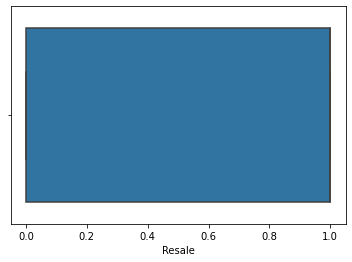

In [202]:
for i in df_m.columns:
    plt.figure()
    sns.boxplot(df_m[i])

In [203]:
# No outliers treatment necessary  due to the nature of the data.

### Statistical significance of variables

In [204]:
x = df_m.drop('Price',1)
y = df_m['Price']

In [205]:
xc = sm.add_constant(x)
ols_m = sm.OLS(y,xc).fit()

In [206]:
pvalues = pd.DataFrame()

In [207]:
pvalues['Pval'] = ols_m.pvalues

In [208]:
# Significant columns
pvalues[pvalues['Pval']<0.05] 

Pval
const           0.000000
Area            0.000000
No. of Bedrooms 0.000034
Resale          0.003597

## Feature Engineering

#### Transformation

In [209]:
df_h.skew()

Price                  4.668390
Area                   2.774507
No. of Bedrooms        0.890345
Resale                 1.342544
MaintenanceStaff       2.395693
Gymnasium              0.181627
SwimmingPool           0.309494
LandscapedGardens      0.723958
JoggingTrack           1.044257
RainWaterHarvesting    0.788242
IndoorGames            0.925858
ShoppingMall           3.427875
Intercom               0.442944
SportsFacility         1.082462
ATM                    2.259278
ClubHouse              0.300984
School                 4.575181
24X7Security           0.323146
PowerBackup           -0.663519
CarParking             0.196626
StaffQuarter           2.694439
Cafeteria              2.383269
MultipurposeRoom       1.218735
Hospital               4.627011
Gasconnection          2.876406
AC                     4.707611
Wifi                   5.875043
Children'splayarea     0.121911
LiftAvailable         -0.867439
VaastuCompliant        0.784163
GolfCourse             5.433370
dtype: f

In [210]:
#Transformation not needed due to the nature of the data.

### Feature Selection

In [211]:
x = df_m.drop('Price',1)
y = df_m['Price']

In [212]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=100)

In [213]:
lr = LinearRegression()

In [214]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [215]:
bwd = sfs(estimator = lr,k_features='best',forward=False,cv=5,scoring='r2')

In [216]:
bwd_mod = bwd.fit(x_train,y_train)

In [217]:
bwd_names = bwd_mod.k_feature_names_
bwd_feat = list(bwd_names)
bwd_feat

['Area', 'No. of Bedrooms', 'Resale']

## Assumptions

### Regression

In [218]:
x = df_m[['Area', 'No. of Bedrooms', 'Resale']]
y = df_m['Price']

In [219]:
xc = sm.add_constant(x)
ols_m = sm.OLS(y,xc).fit()
ols_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     263.9
Date:                Thu, 05 Aug 2021   Prob (F-statistic):          4.72e-163
Time:                        20:42:54   Log-Likelihood:            -1.4054e+05
No. Observations:                7719   AIC:                         2.811e+05
Df Residuals:                    7715   BIC:                         2.811e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.629e+06   6.55e+05      5.543      0.000    2.35e+06    4.91e+06
Area             8770.9289    693.354     12.650      0.000    7411.768    1.01e+04
No. of Bedrooms  1.863e+06   4.49e+05      4.146      0.000    9.82e+05    2.74e+06
Resale          -1.374e+06   4.72e+05     -2.912      0.004    -2.3e+06   -4.49e+05
==============================================================================
Omnibus:                     9805.637   Durbin-Watson:                   1.673
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2444820.132
Skew:                           6.852   Prob(JB):                         0.00
Kurtosis:                      89.102   Cond. No.                     3.92e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.92e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [220]:
print('The Accuracy of the NUMBAI DATASET using OLS method is:' ,(ols_m.rsquared*100).round(2),'%')

The Accuracy of the NUMBAI DATASET using OLS method is: 9.31 %


In [221]:
#Accuracy is very low